In [1]:
import csv
from scipy import sparse
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# min1pipe 場所

In [6]:
min1pipe =[]
with open(r"C:\Users\natsu\Desktop\sotsuken\MIN1PIPE\1030conclution\location_min1pipe.csv", encoding='utf-8') as f:
    reader = csv.reader(f)
    [min1pipe.append(i[0]) for i in reader]

min1pipe[0] = 8176
min1pipe = np.asarray([int(min1pipe[i]) for i in range(len(min1pipe))])

# min1pipe 時系列データ

In [9]:
filename =r"C:\Users\natsu\Desktop\sotsuken\MIN1PIPE\1030conclution\min1pipe_spike.csv"
import pandas as pd

df = pd.read_csv(filename)
#print(df)
min1pipe_spikes = df.values

# caiman 場所

In [7]:
caiman_location = sparse.load_npz(r"C:\Users\natsu\CaImAn\demos\notebooks\caiman_conclution.npz")
caiman = [(caiman_location.getcol(n).nonzero()[0]) for n in range(0,61)]

caiman =np.asarray(caiman)

# caiman 時系列データ

In [10]:
#名前がアレだがmin1pipeをcaimanで計測したもの
caiman_spikes = np.load(r"C:\Users\natsu\CaImAn\demos\notebooks\min1pipe_spikes.npy")

# 場所距離を出す

In [25]:
def loc_dist(m,n):
    point=min1pipe[m]
    points=caiman[n]
    point_x = point/150 
    point_y = point%150
    points_x =[]
    points_y =[]
    D = []
    j = 0
    for i in points:
        points_x.append(int(i/150))
        points_y.append(i%150)           
        X = (points_x[j] - point_x)**2
        Y = (points_y[j] - point_y)**2 
        D.append((X + Y)**(1/2)) 
        j +=1
    
    return(m,n,np.mean(D)) 

In [59]:
location_dist = np.asarray([[loc_dist(m,n) for n in range(len(caiman))] for m in range(len(min1pipe))])

In [69]:
zentai_heikin = np.mean(np.asarray([[location_dist[m][n][-1] for n in range(len(caiman))] for m in range(len(min1pipe))]))
zentai_median = np.median(np.asarray([[location_dist[m][n][-1] for n in range(len(caiman))] for m in range(len(min1pipe))]))
zentai_hensa = np.std(np.asarray([[location_dist[m][n][-1] for n in range(len(caiman))] for m in range(len(min1pipe))]))
zentai_min = np.min(np.asarray([[location_dist[m][n][-1] for n in range(len(caiman))] for m in range(len(min1pipe))]))
zentai_max = np.max(np.asarray([[location_dist[m][n][-1] for n in range(len(caiman))] for m in range(len(min1pipe))]))

print(zentai_heikin,":",zentai_median,":",zentai_hensa,":",zentai_min,";",zentai_max)

71.64060391109919 : 69.38744696064994 : 34.38900555198605 : 5.67777130375557 ; 182.39343518966257


In [111]:
print(sortdist.shape)
#print(sortdist[0])

caiman側のidで一番近いヤツ
sortdist[:,0,1]

(58, 61, 4)


array([31.,  5., 31., 21.,  9., 45.,  6., 45., 43., 42., 41.,  9., 32.,
       44.,  3., 33.,  7., 24., 48., 46.,  8., 46.,  2., 57.,  1.,  0.,
       10., 46., 57., 18., 18., 34., 58., 58., 17., 15., 36., 36., 17.,
       51., 17., 39., 56., 37., 22., 54., 38., 21., 21., 39., 22., 40.,
       19., 59., 59., 20., 59., 59.])

In [113]:
#caiman側と一番近い場合の距離
sortdist[:,0,2]

array([ 5.71693062,  8.18499133,  5.6777713 , 26.75983254, 27.57729033,
        9.31181991,  6.81639635, 15.91983498,  8.26556851,  9.27497407,
        8.5752179 ,  7.89820662,  6.66683142,  9.48979678,  5.70463018,
        6.8706556 ,  6.20548008,  8.58629675,  5.79945515,  8.32162905,
        7.69670967,  7.91687227,  8.17031702, 12.39560811,  7.32987185,
        8.05007555,  6.46283639, 20.19761158,  6.81099907, 12.29217   ,
        7.85217135,  8.03667256,  6.79581671,  6.56341912, 20.28583599,
        9.08963268,  6.68320931,  9.86160219,  9.16440034,  9.29301376,
        8.46130608, 15.78309148, 13.48877809, 10.60272549, 16.14468538,
        9.35009977,  9.0994758 ,  8.65792213, 10.46607478,  8.21074494,
        8.275376  ,  9.0447672 ,  7.6101042 , 27.13798474,  8.07534562,
        7.71470629, 21.01061368, 27.40091467])

# 場所可視化

In [156]:
def comp_place_with(m,c):
    #min1pipe
    p = min1pipe[m]
    y = int(p//150)
    print("ヨコ",y)
    x = int(p%150) 
    print("タテ",x)
    im = np.zeros((150,150,4),dtype=np.uint8)
    im[:,:,-1]=255#アルファチャンネルz
    im[x][y][0] = 150
    im[x+1][y][0] = 150
    im[x-1][y][0] = 150
    im[x][y+1][0] = 150
    im[x][y-1][0] = 150
    #caiman
    for q in caiman[c]:
        y = int(q//150)
        x = int(q%150) 
        im[x][y][1] = 150
        pil = Image.fromarray(im) 
    
    pil = Image.fromarray(im)
    plt.imshow(pil)

ヨコ 54
タテ 76


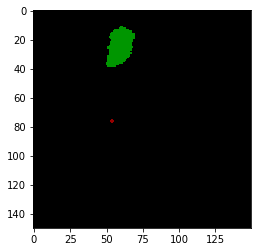

In [157]:
comp_place_with(0,0)

# 系列距離を出す

In [268]:
def thresh_euclid(a,b,x):
    #a-minpip,b-caiman 
    a2 = [i*10000 for i in a]
    b2 = [i if i > x else 0 for i in b]
    return np.sqrt(np.sum([(float(a2e) - float(b2e)) ** 2 for a2e,b2e in zip(a,b2)]))

In [270]:
def series_dist(m,n,o):
    a = min1pipe_spikes[m]
    b = caiman_spikes[n]
    if o == "ham":
        return len([1 for k in range(len(a)) if ((a[k]==0)&(b[k]!=0))|((a[k]!=0)&(b[k]==0))])
    if o == "euc":
        return euclid(m,n)
    
def id_series(m,n,o):
    #idわかるように
    a = min1pipe_spikes[m]
    b = caiman_spikes[n]
    if o == "ham":
        return (m,n,len([1 for k in range(len(a)) if ((a[k]==0)&(b[k]!=0))|((a[k]!=0)&(b[k]==0))]))
    if type(o) == int:
        return (m,n,thresh_euclid(a,b,o))

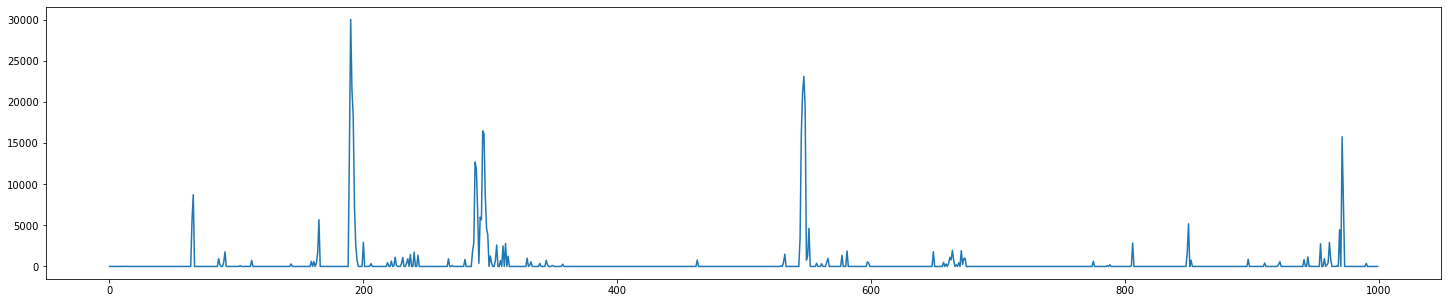

In [273]:
#アイデア用可視
plt.figure(figsize=(25,5))
plt.plot(caiman_spikes[0])

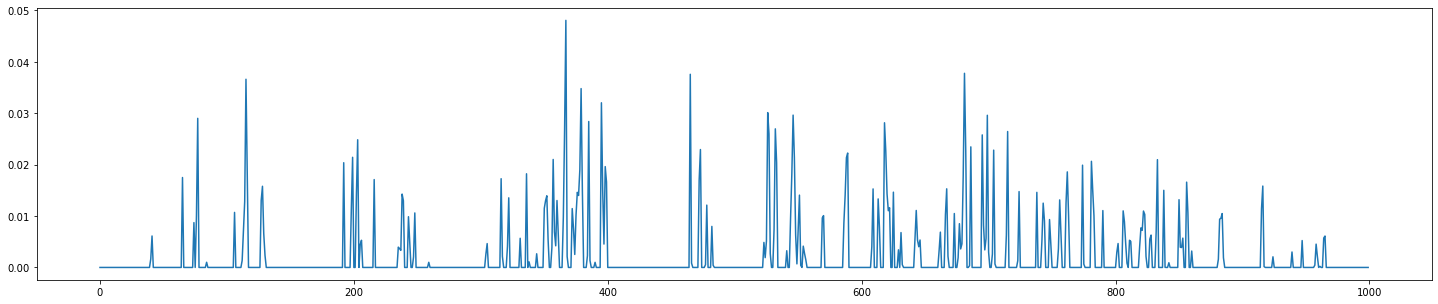

In [276]:
#アイデア用可視
plt.figure(figsize=(25,5))
plt.plot(min1pipe_spikes[0])

In [307]:
#print(min1pipe_spikes[0])
#np.max(min1pipe_spikes[0])

def zero_one(A):
    # A = min1pipe_spikes[m] or caiman_spikes[n]
    return [1 if float(i) > np.max([float(i) for i in  A])/2.0 else 0 for i in A]

def spike_plot(s):
    plt.figure(figsize=(25,5))
    plt.plot(s)

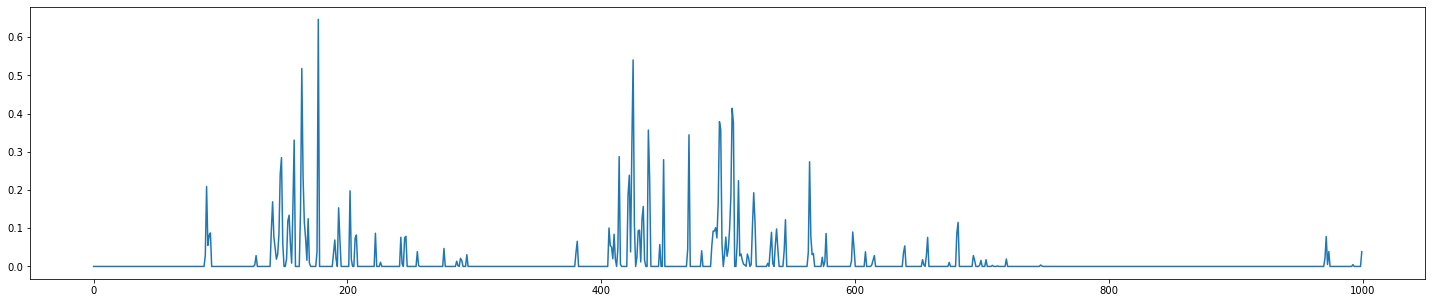

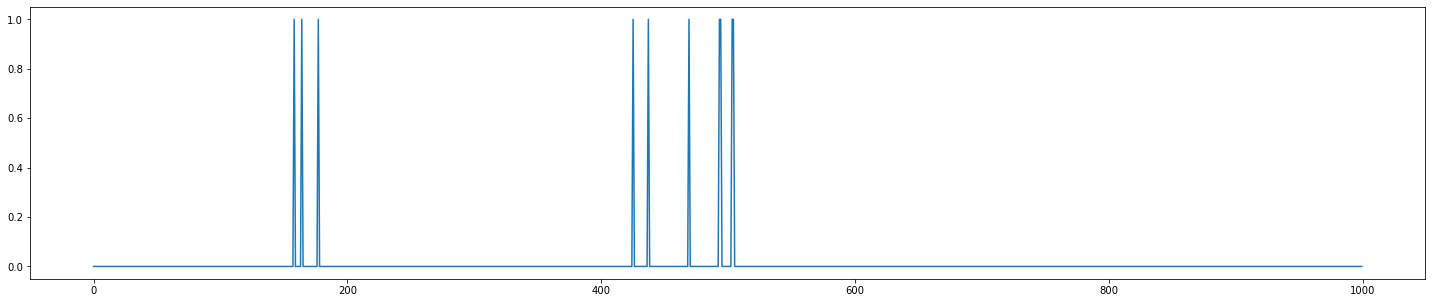

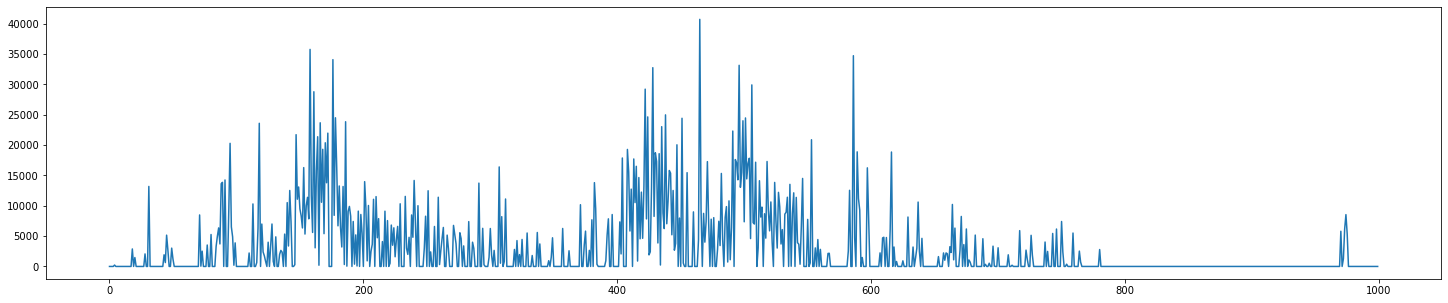

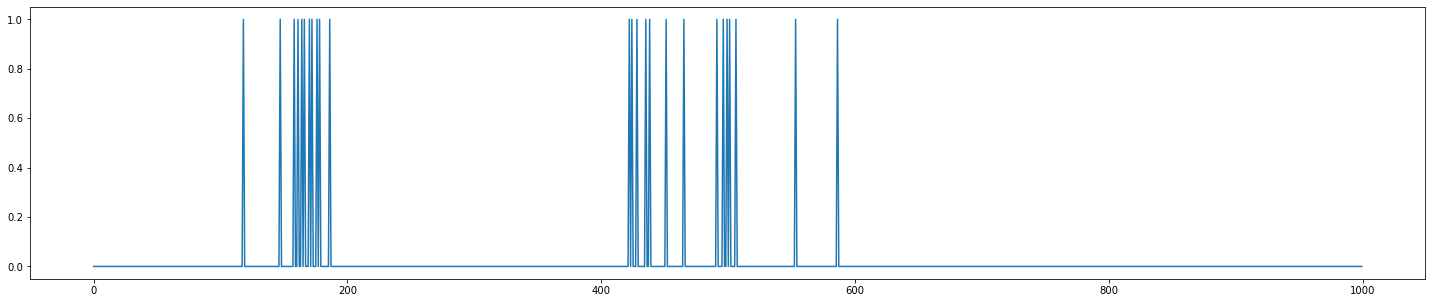

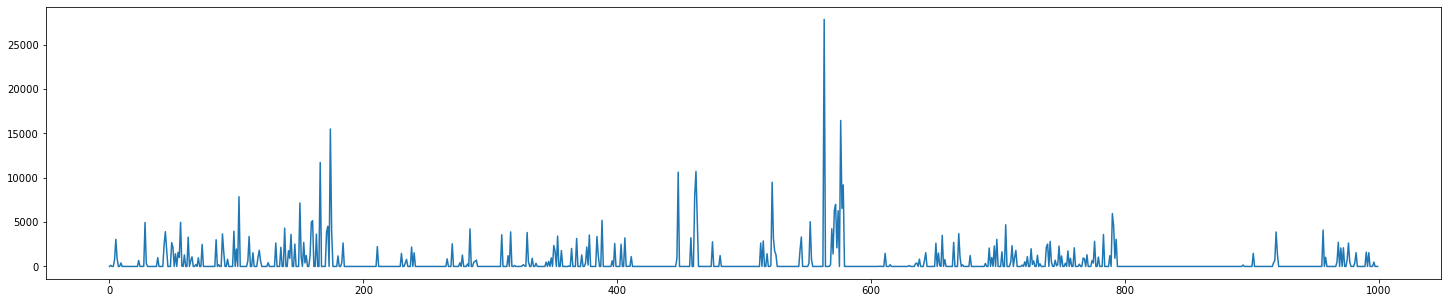

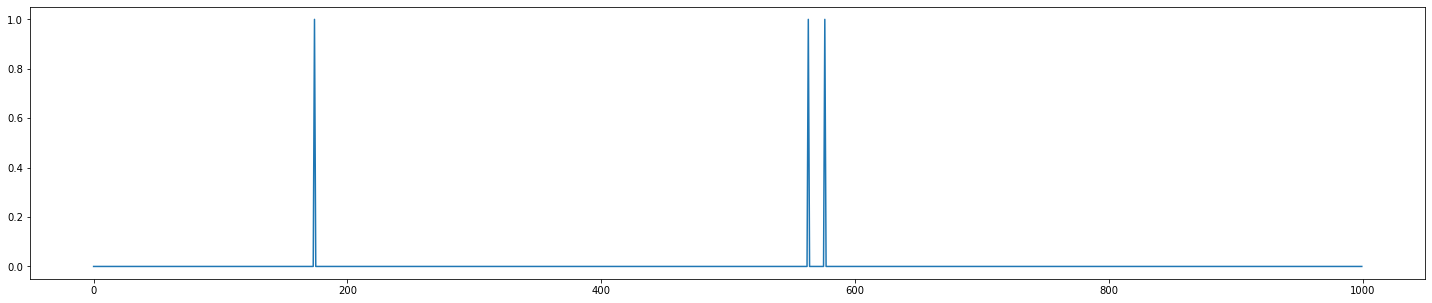

In [309]:
def spike_plot(s):
    plt.figure(figsize=(25,5))
    plt.plot(s)

spike_plot(min1pipe_spikes[1])
spike_plot(zero_one(min1pipe_spikes[1]))

spike_plot(caiman_spikes[5])
spike_plot(zero_one(caiman_spikes[5]))

spike_plot(caiman_spikes[13])
spike_plot(zero_one(caiman_spikes[13]))

In [326]:
def zero_one(A):
    # A = min1pipe_spikes[m] or caiman_spikes[n] 系列データ
    return [1 if float(i) > np.max([float(i) for i in  A])/2.0 else 0 for i in A]

def spike_plot(s):
    plt.figure(figsize=(25,5))
    plt.plot(s)

#def thresh_ham(m,c):
#    # m min1pipe_spikes[m] /c caiman_spikes[c]
#    ms = zero_one(m)
#    cs = zero_one(c)
#    D = [1 if cse==mse else 0 for cse,mse in zip(ms,cs)]
#    return D

def thresh_ham(m,c):
    cs = [1 if float(i) > np.max([float(i) for i in caiman_spikes[m]])/2.0 else 0 for i in caiman_spikes[m]]
    ms = [1 if float(i) > np.max([float(i) for i in min1pipe_spikes[c]])/2.0 else 0 for i in min1pipe_spikes[c]]
    D = [1 if cse == mse else 0 for cse,mse in zip(cs,ms)]
    return D

In [327]:
th_hamset = np.asarray([[thresh_ham(m,c) for m in range(0,57)] for c in range(0,60)])

ValueError: could not convert string to float: '-'

In [127]:
#haming

ham_id = np.asarray([[id_series(m,n,"ham") for n in range(len(caiman))] for m in range(len(min1pipe))])

ham_heikin = np.mean(np.asarray([[ham[m][n] for n in range(len(caiman))] for m in range(len(min1pipe))]))
ham_median = np.median(np.asarray([[ham[m][n] for n in range(len(caiman))] for m in range(len(min1pipe))]))
ham_hensa = np.std(np.asarray([[ham[m][n] for n in range(len(caiman))] for m in range(len(min1pipe))]))
ham_min = np.min(np.asarray([[ham[m][n] for n in range(len(caiman))] for m in range(len(min1pipe))]))
ham_max = np.max(np.asarray([[ham[m][n] for n in range(len(caiman))] for m in range(len(min1pipe))]))

print(ham_heikin,":",ham_median,":",ham_hensa,":",ham_min,";",ham_max)

sort_ham = np.array([ham_id[z][np.argsort(ham_id[z][:,-1])] for z in range(0,58)])

336.7247032221594 : 325.0 : 95.43429317303352 : 96 ; 755


11
ヨコ 54
タテ 76


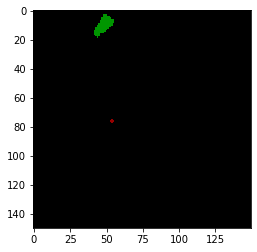

In [175]:
print(sort_ham[0][0][1])
comp_place_with(0,11)

# まとめる

In [29]:
locationを優先

def pac_dist(m,n):
    m,n,p=loc_dist(m,n)
    s = spike_dist(m,n,"ham")
    return(m,n,p,s) 

In [32]:
distset = np.asarray([[pac_dist(m,n) for n in range(len(caiman))] for m in range(len(min1pipe))])

In [35]:
sortdist = np.array([distset[z][np.argsort(distset[z][:,-2])] for z in range(0,58)])

# ヒストグラムの可視化　出来る限り生データ見ること

In [40]:
def vis_hist_set(n):
    plt.figure(figsize=(25,9))
    title = "min1pipe neuron ID " + str(n)
    plt.title(title,fontsize=20)
    score = [0.1*sortdist[n][m][-1] for m in range(0,59)]
    label = [int(sortdist[n][m][1]) for m in range(0,59)]
    pos = np.arange(len(score))
    plt.bar(pos, score, tick_label = label)
    plt.bar(pos,[sortdist[n][m][-2] for m in range(0,59)],color="red",width=0.2)
    plt.grid()
    plt.xlabel("CaImAn neuron ID",fontsize=20)
    plt.ylabel("distance of pix",fontsize=20,color="red")
    plt.show()

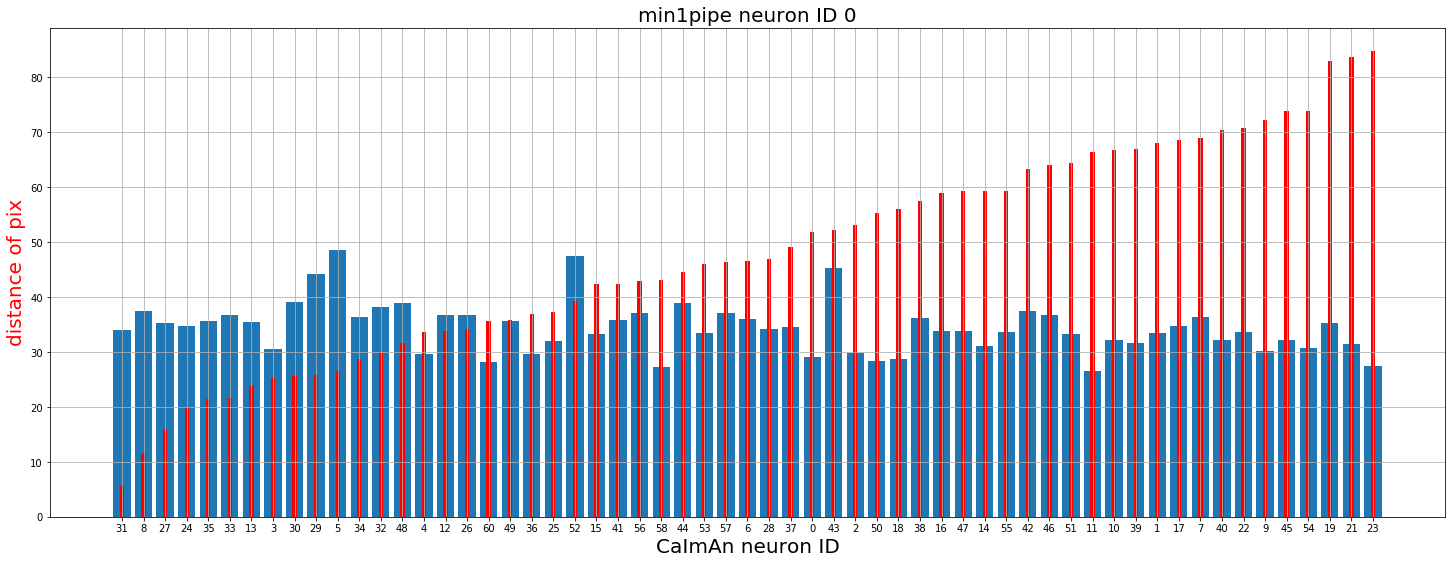

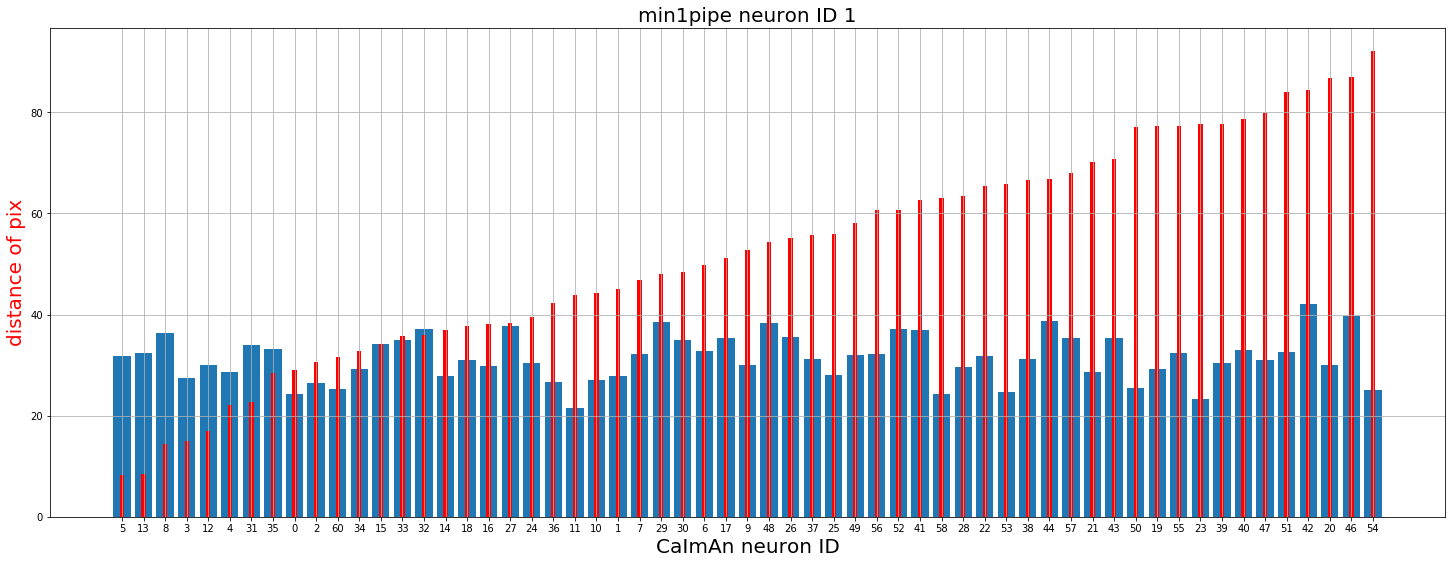

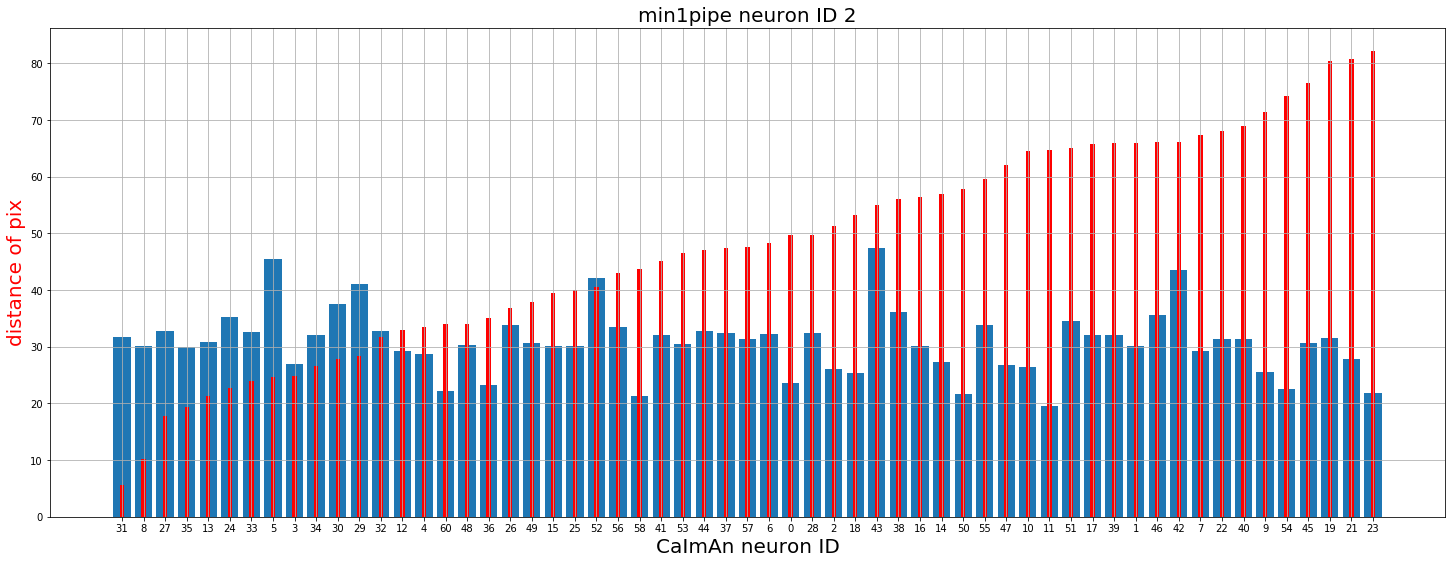

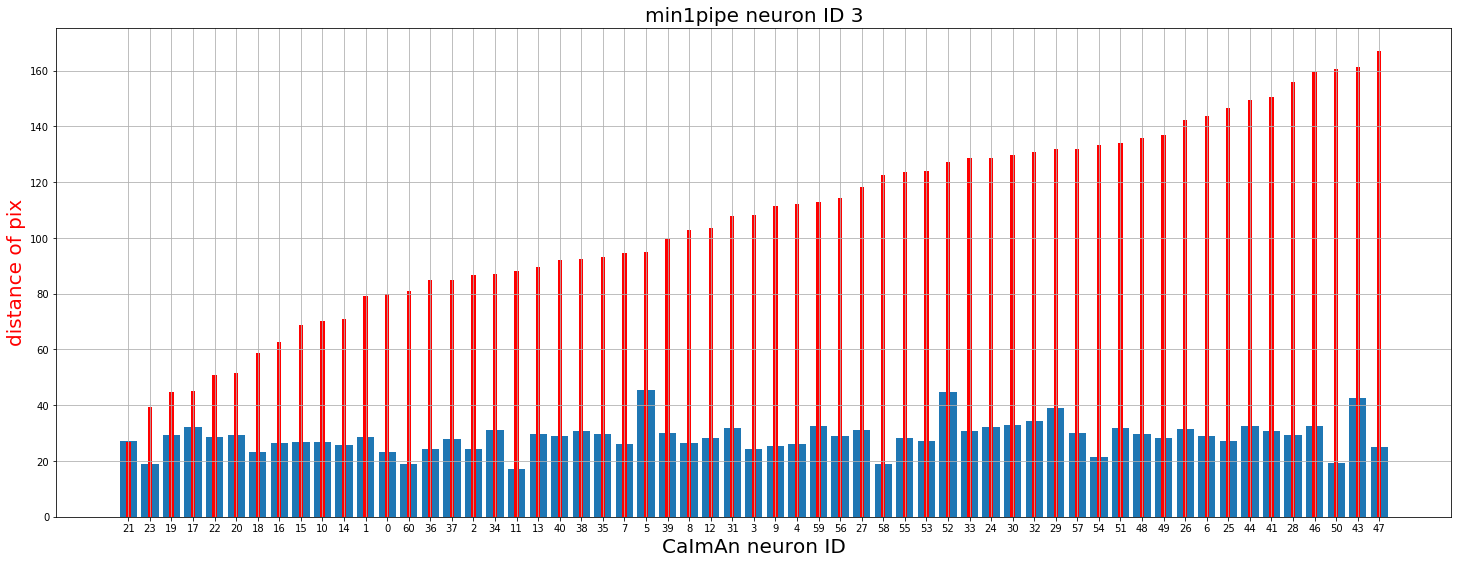

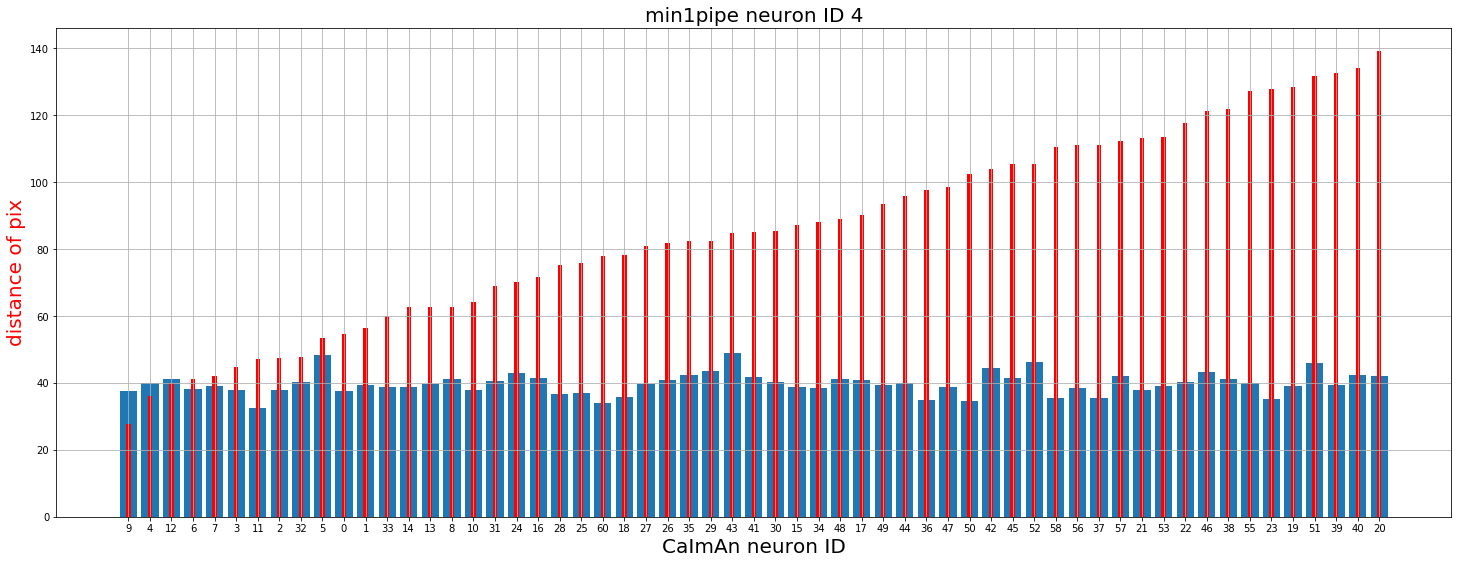

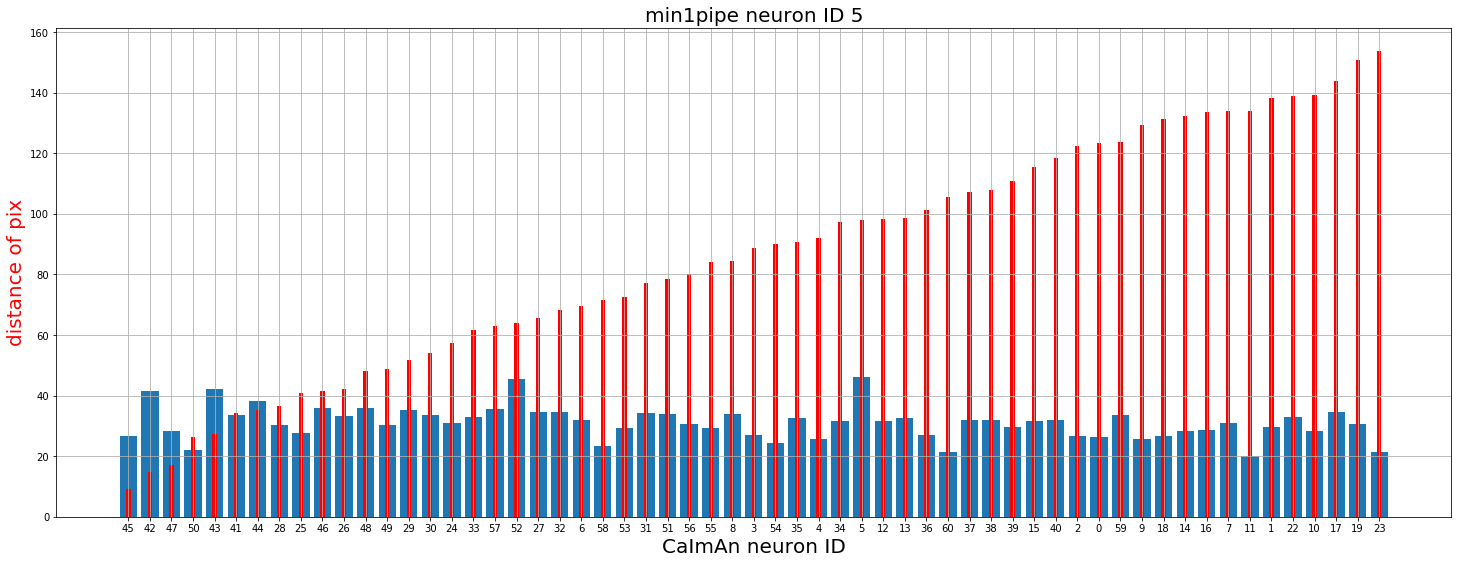

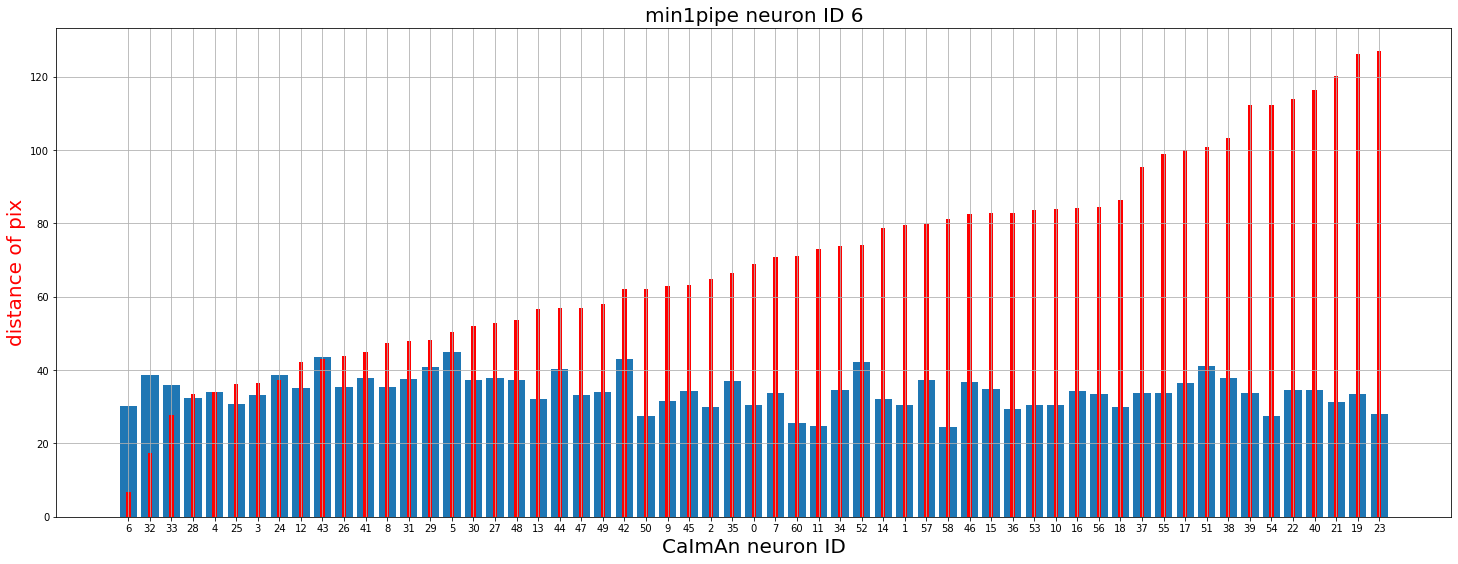

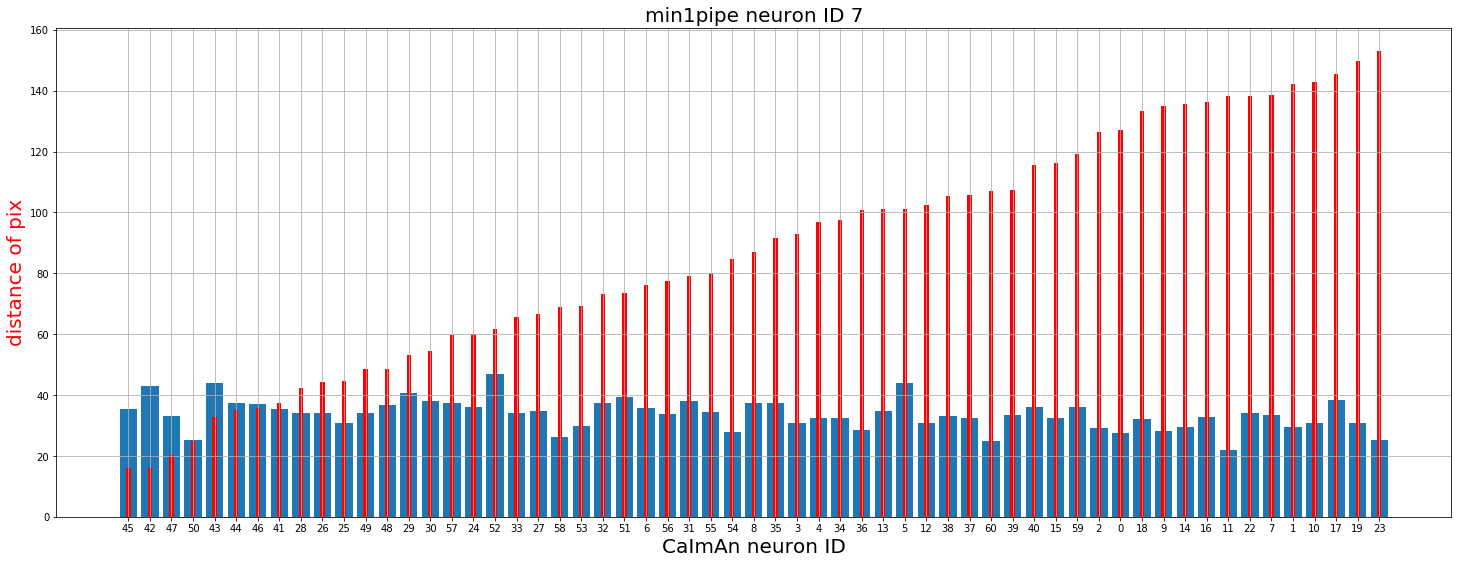

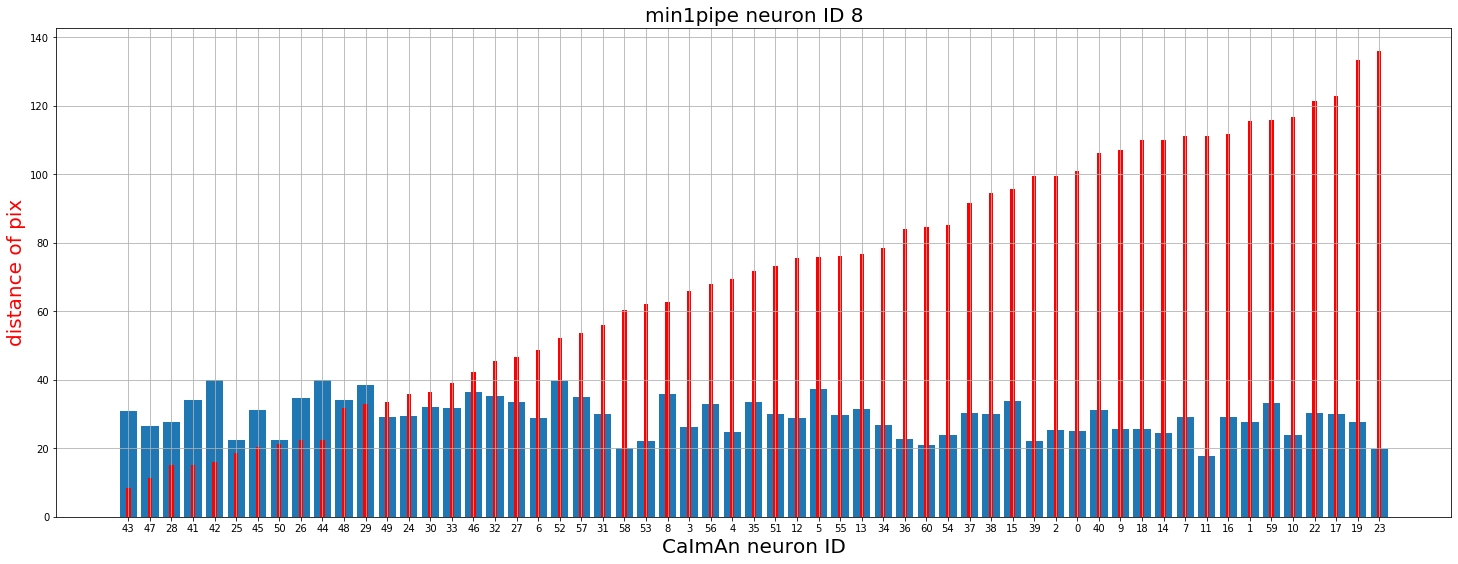

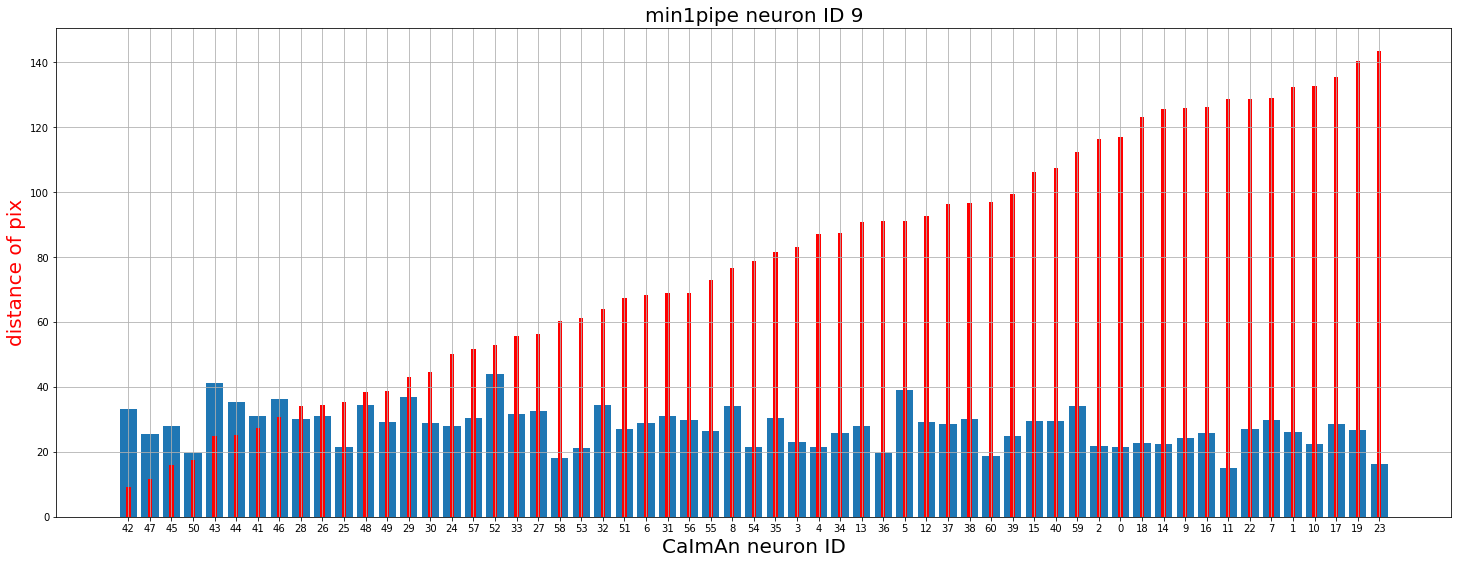

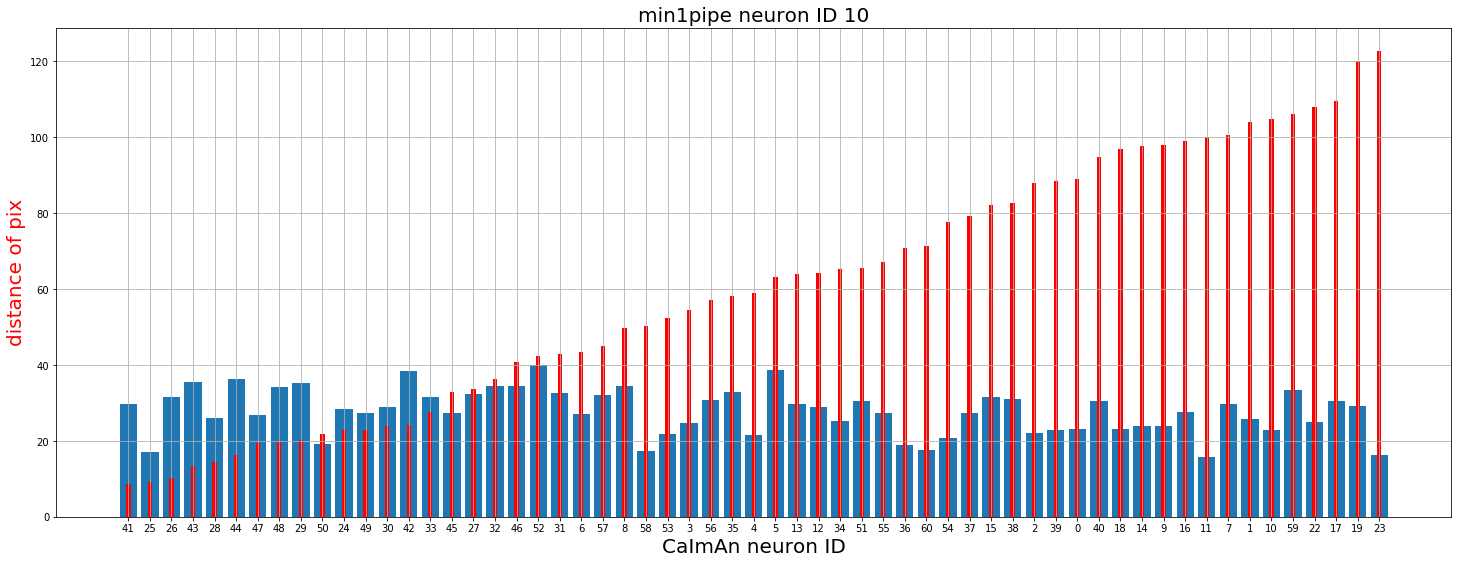

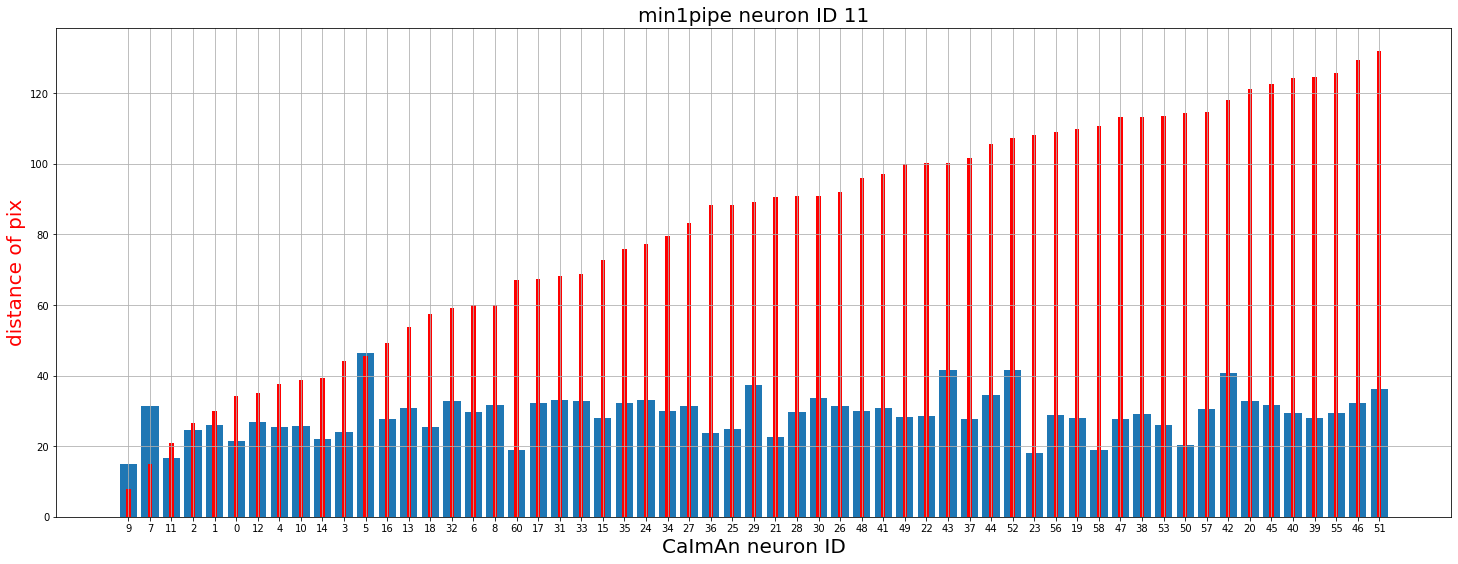

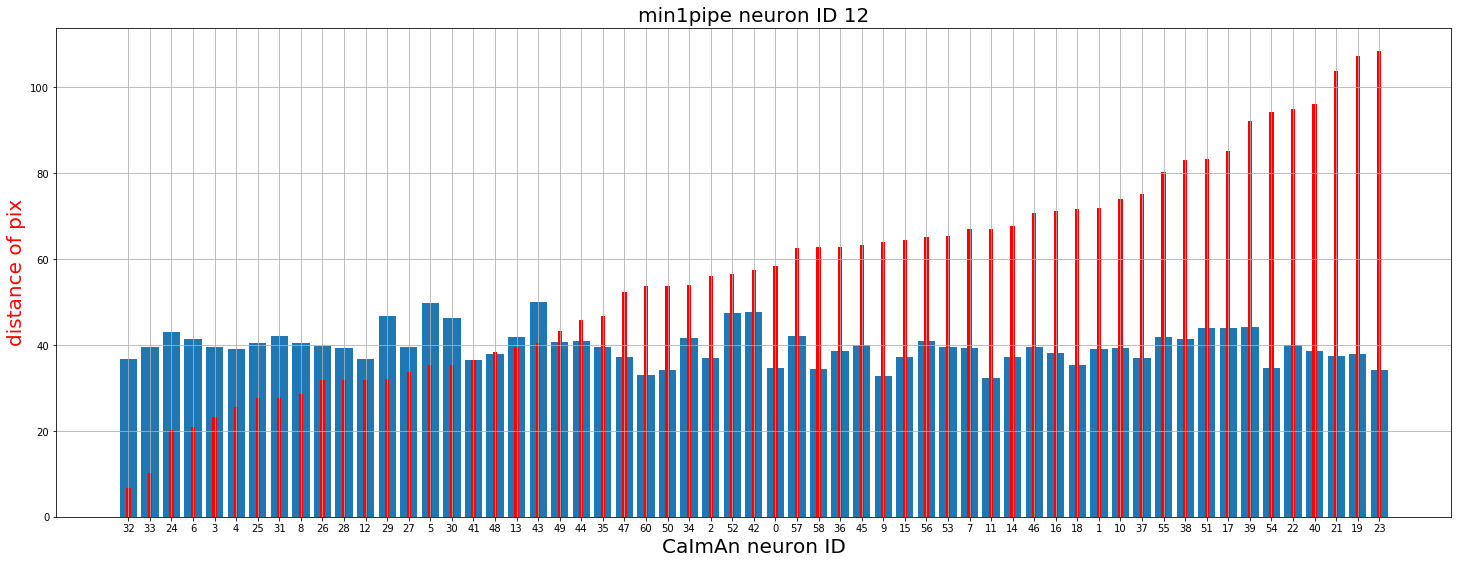

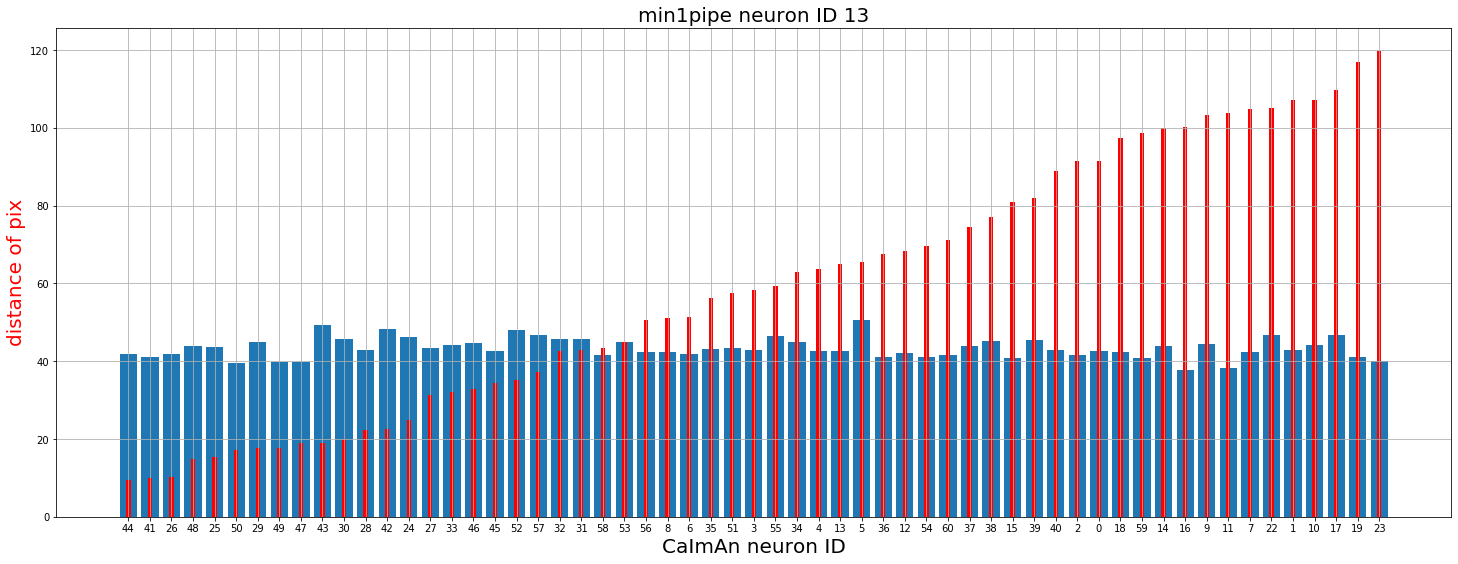

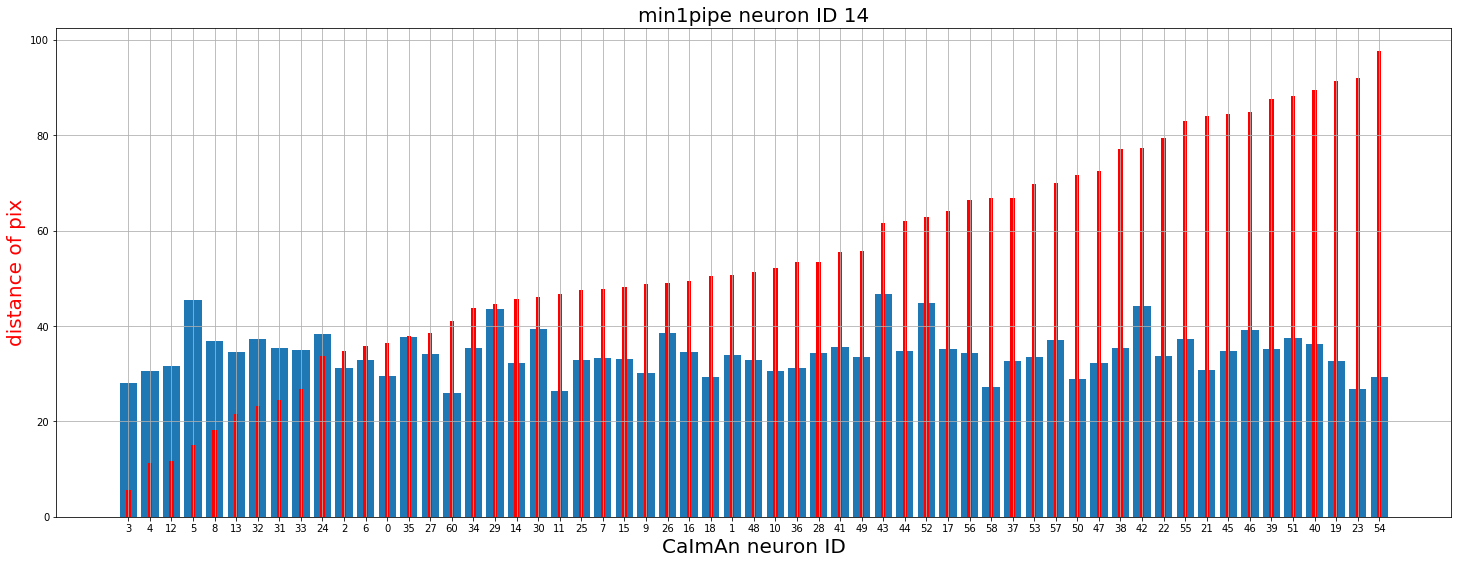

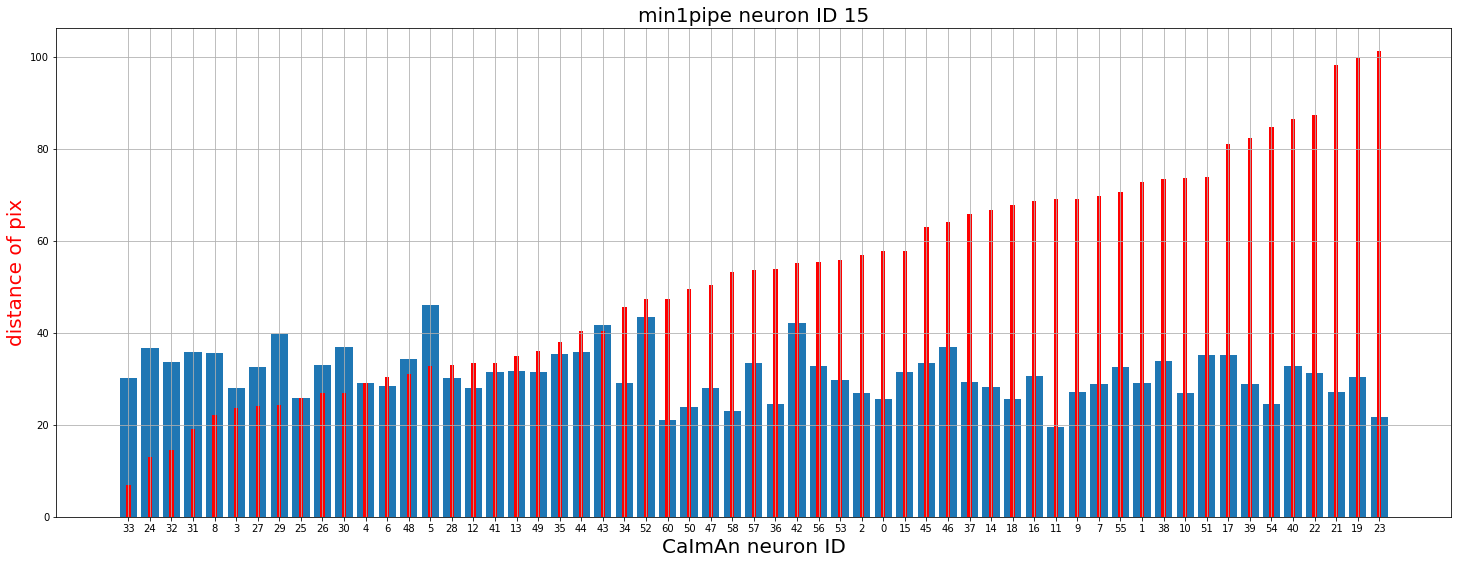

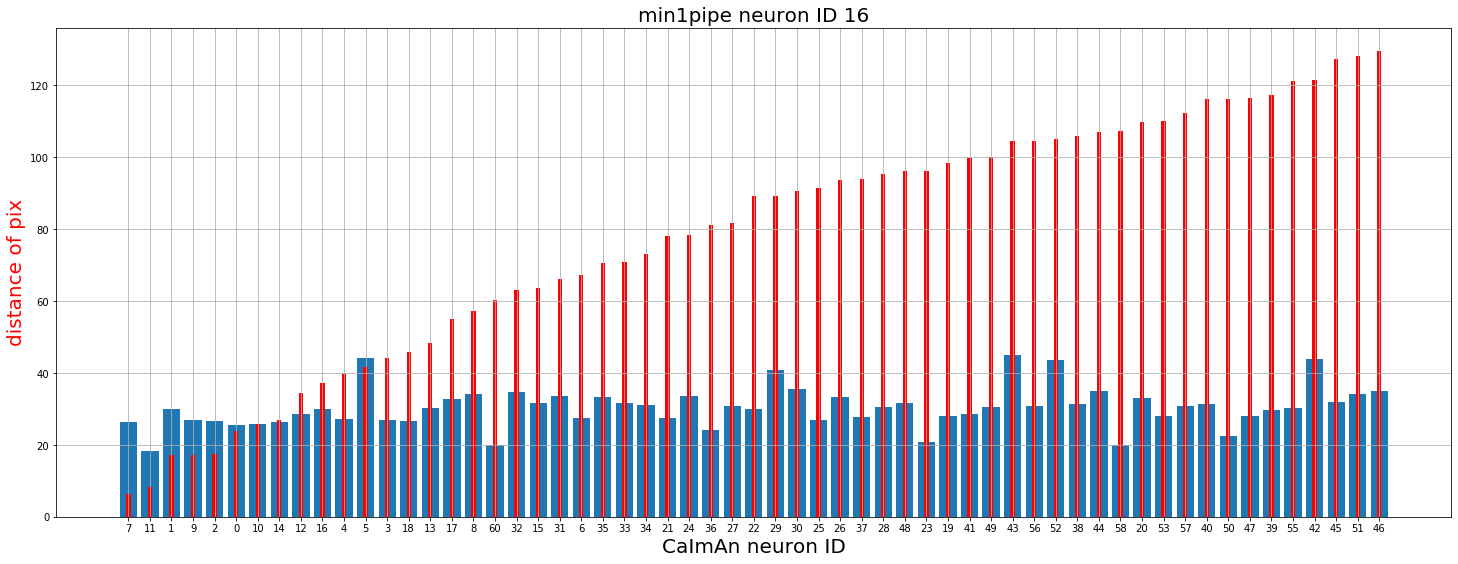

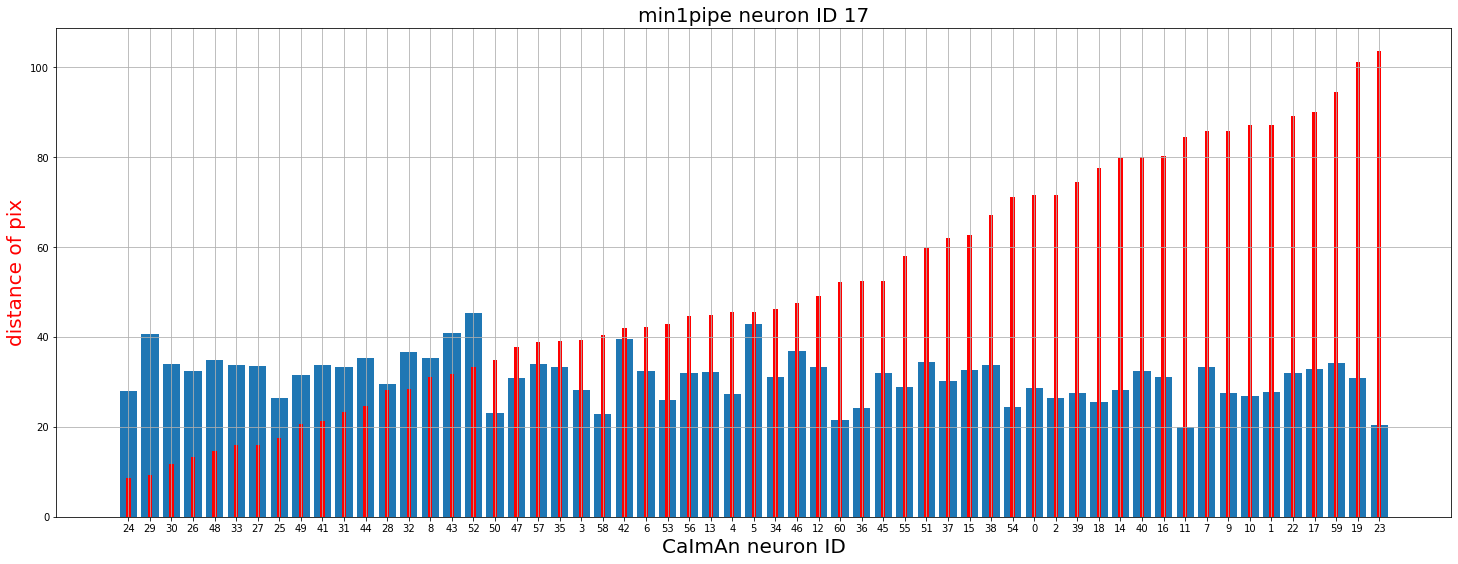

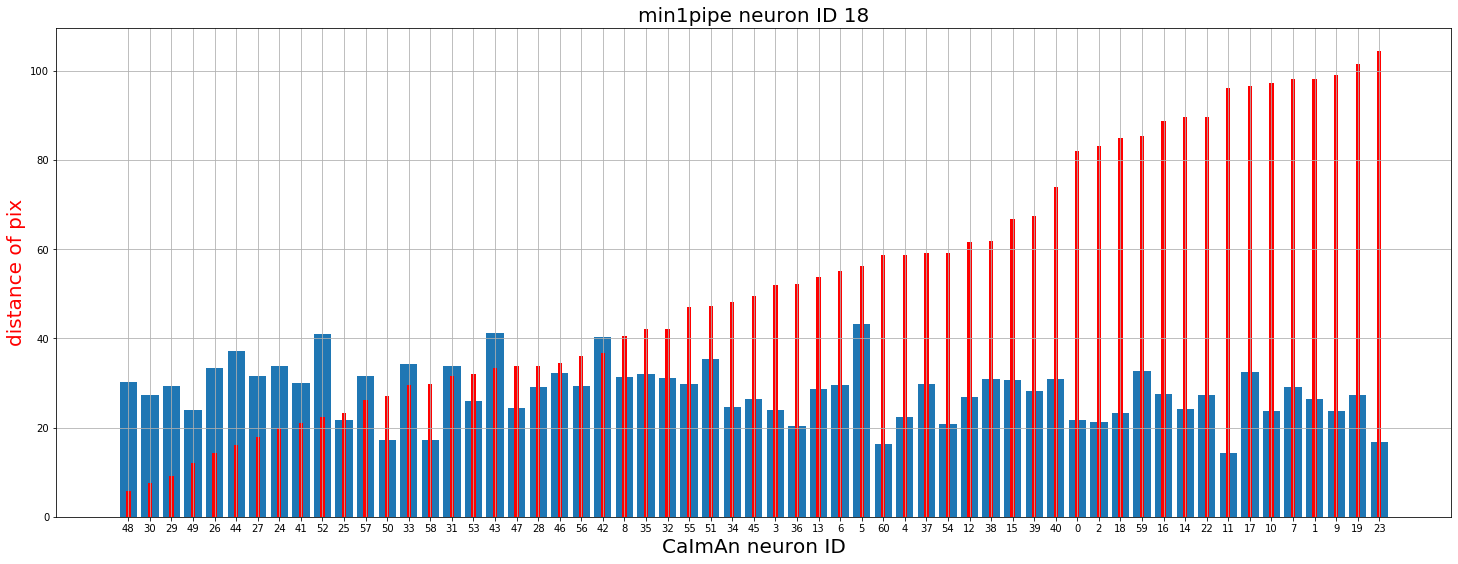

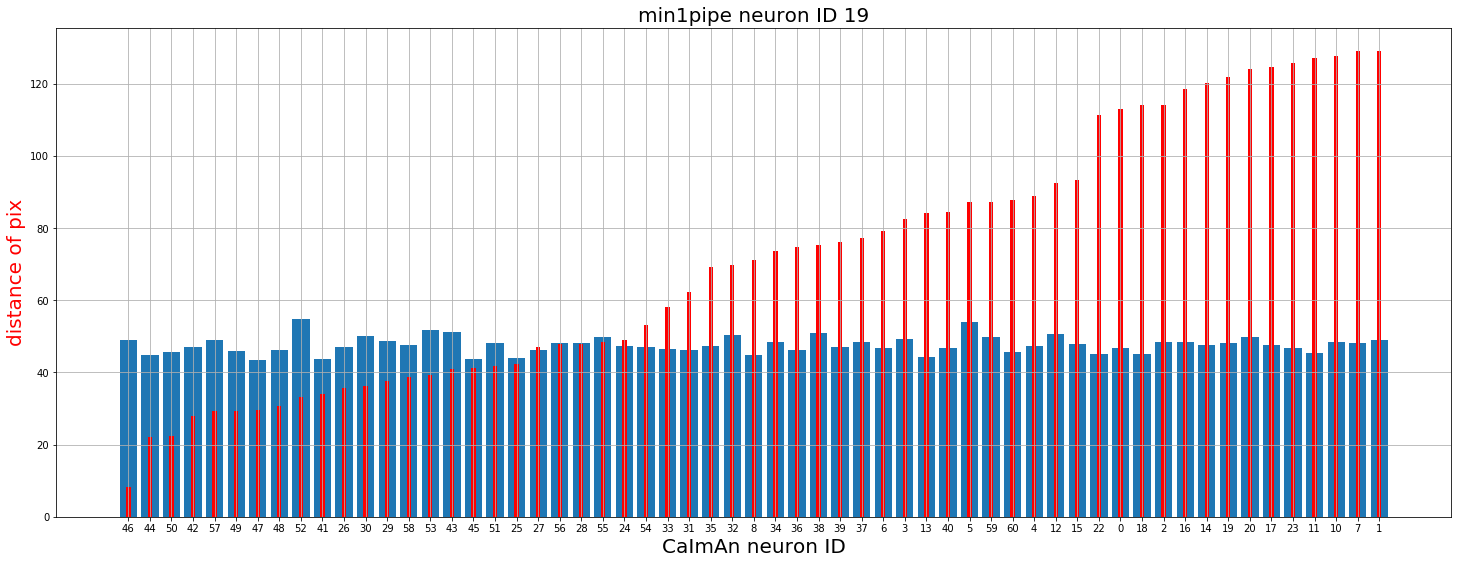

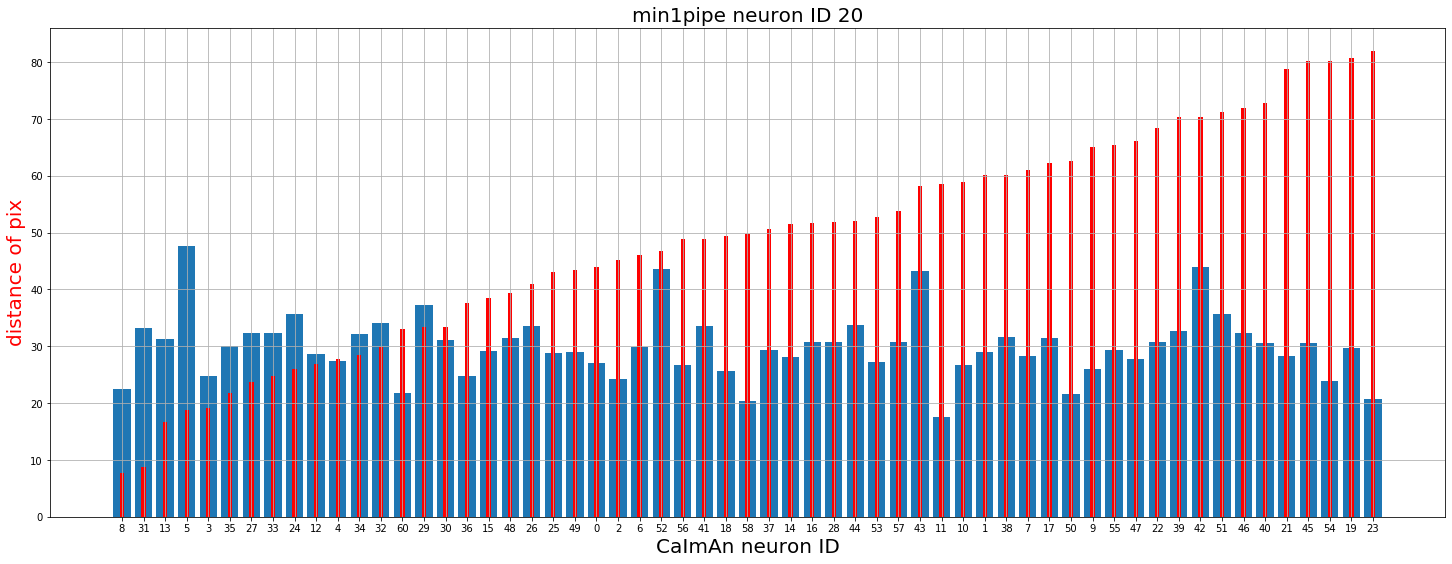

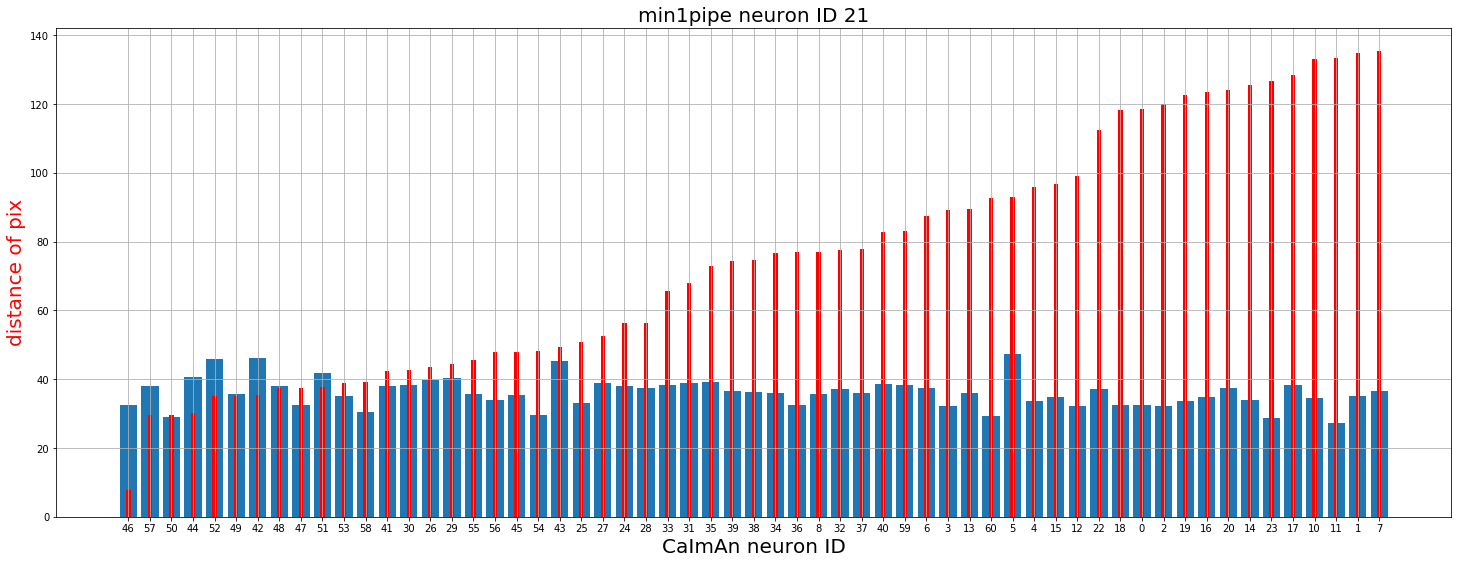

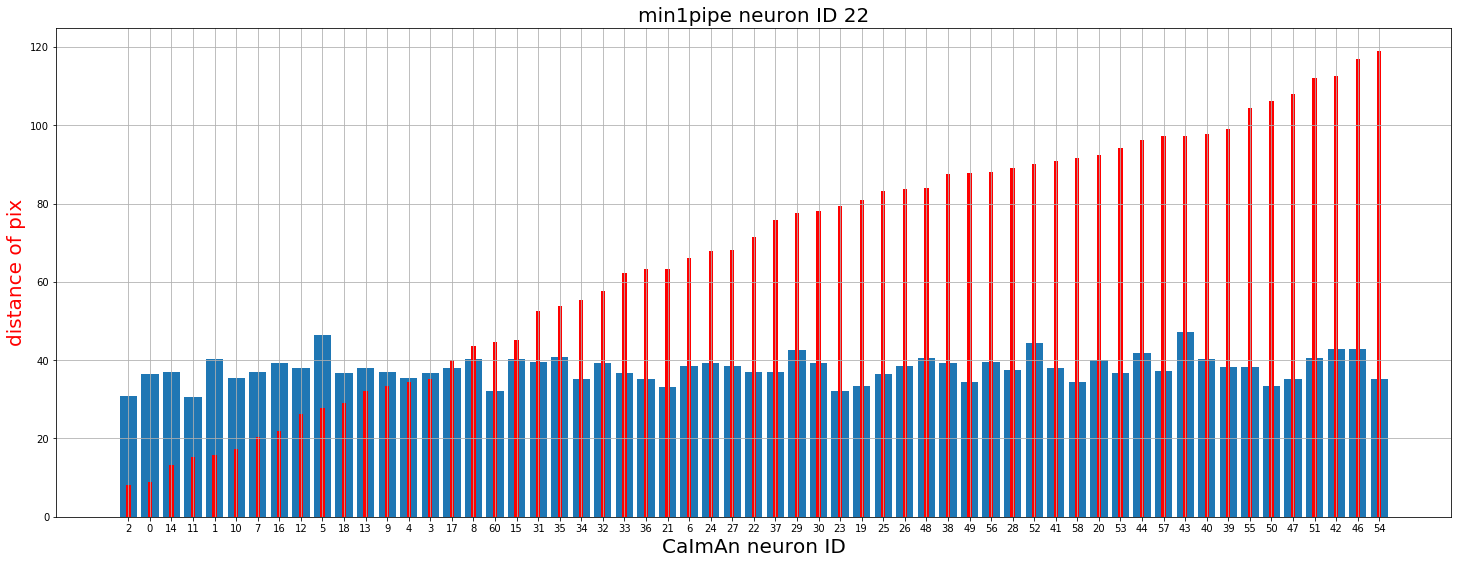

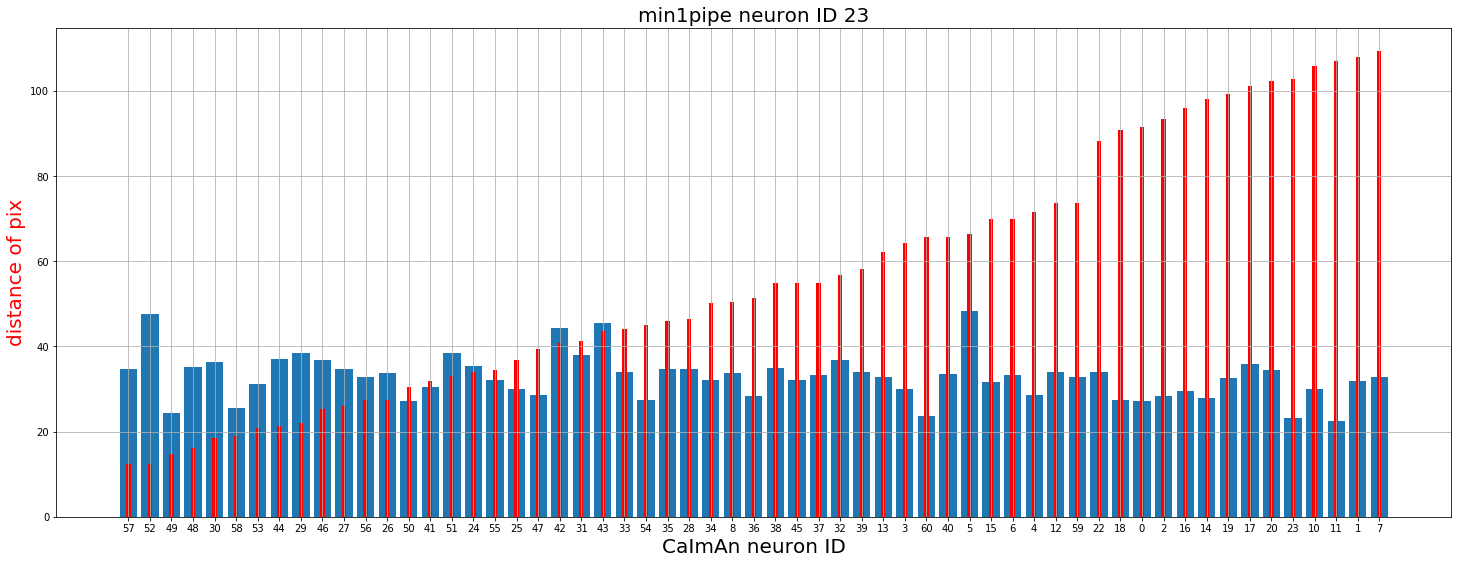

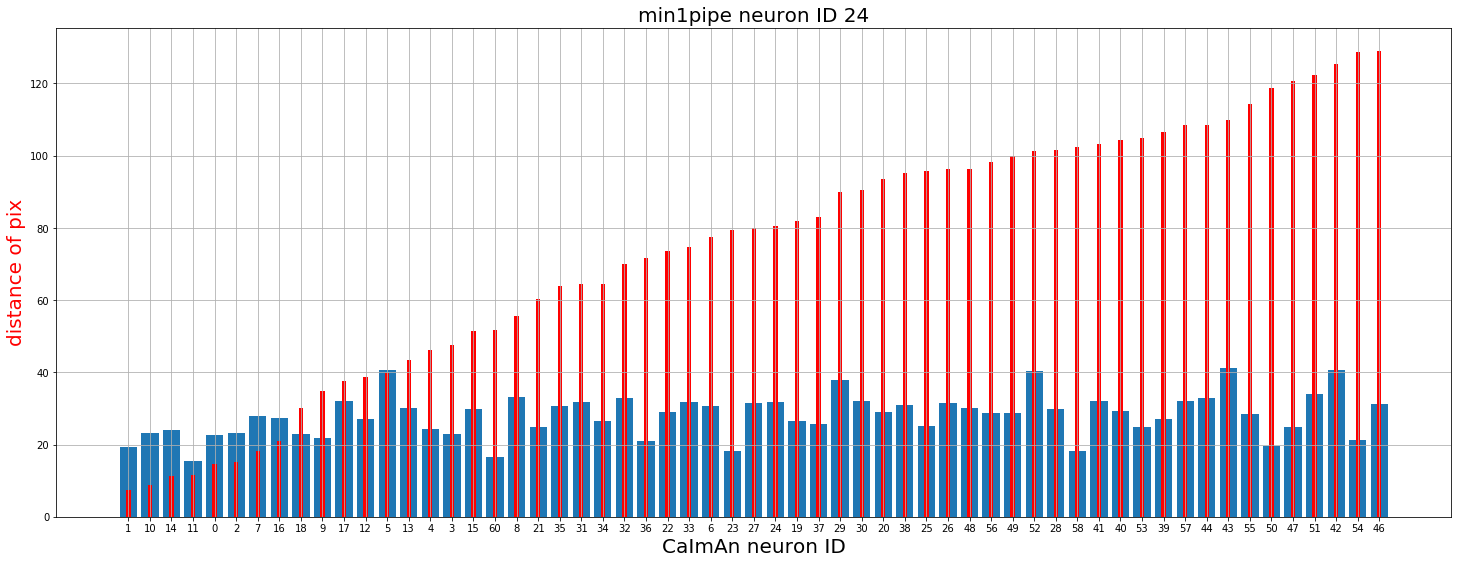

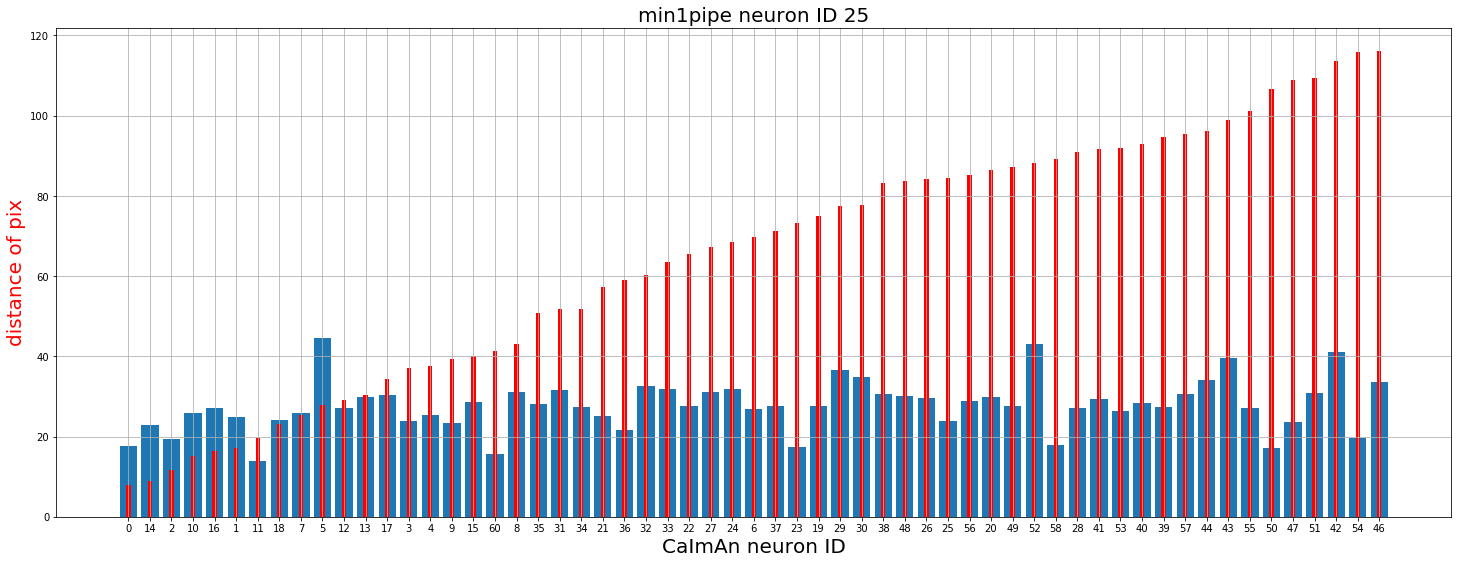

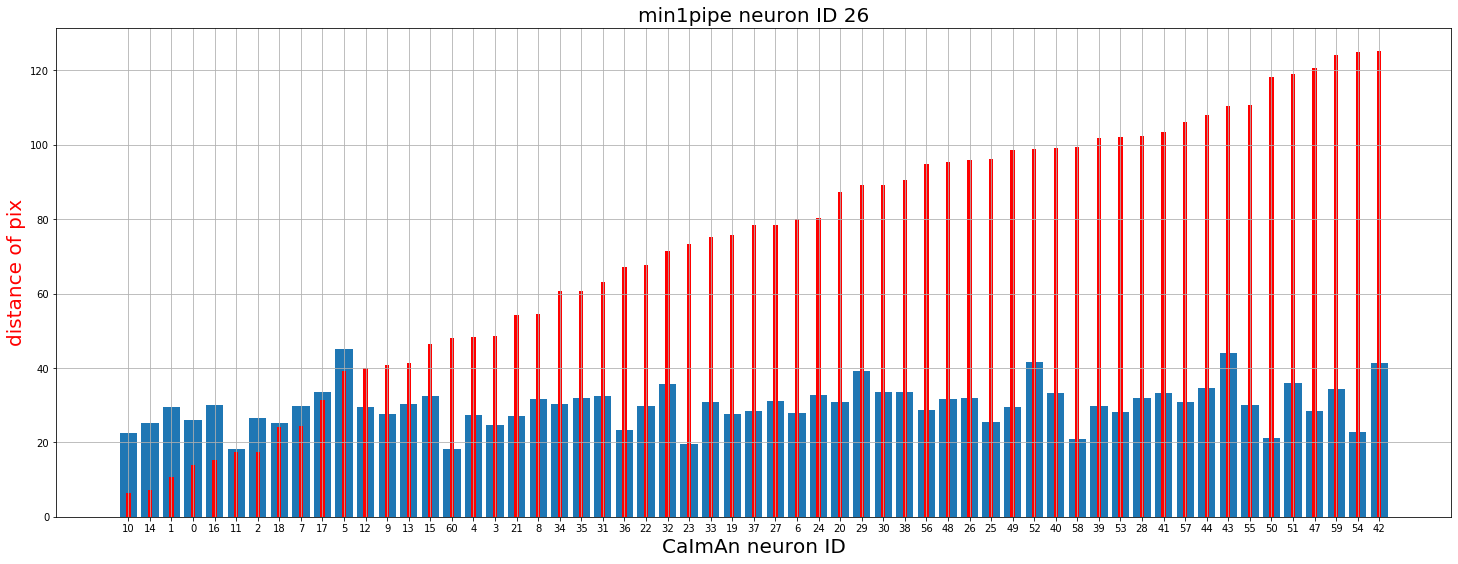

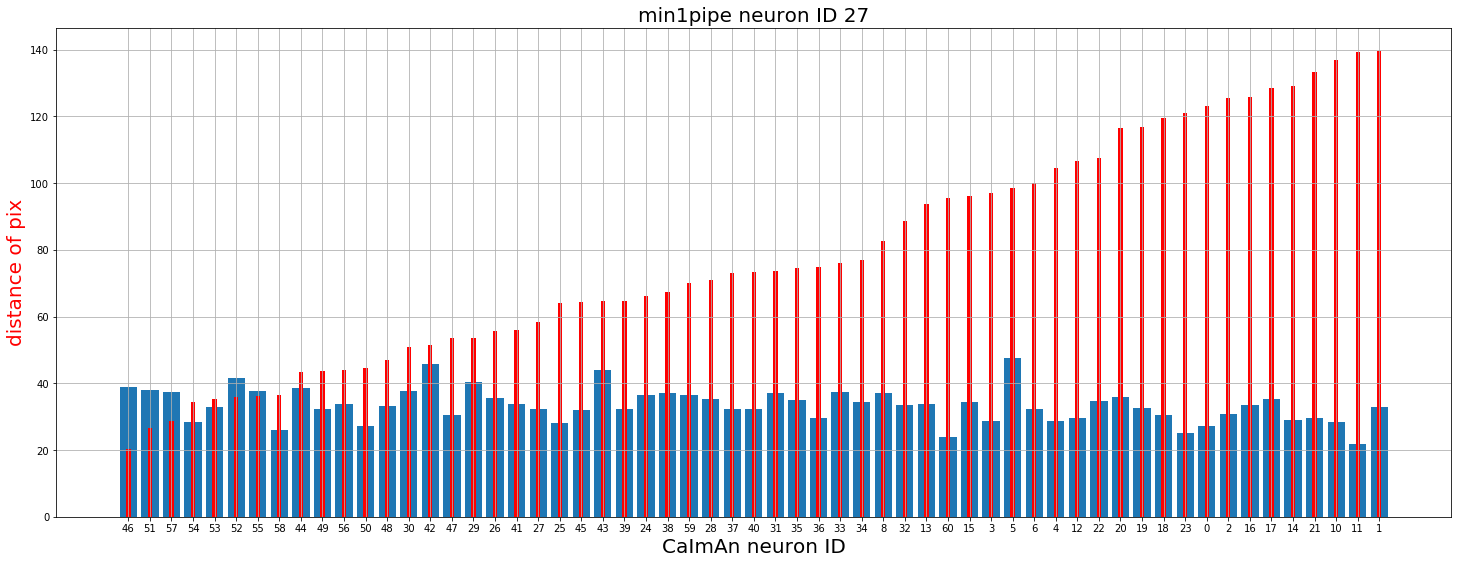

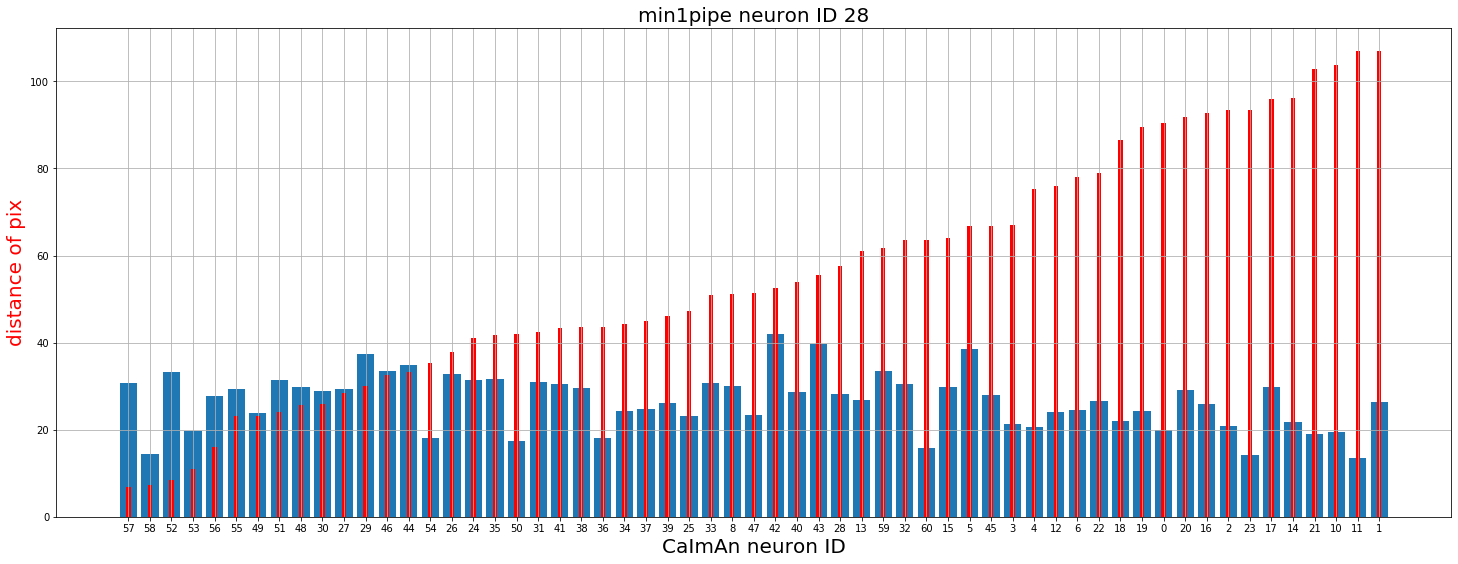

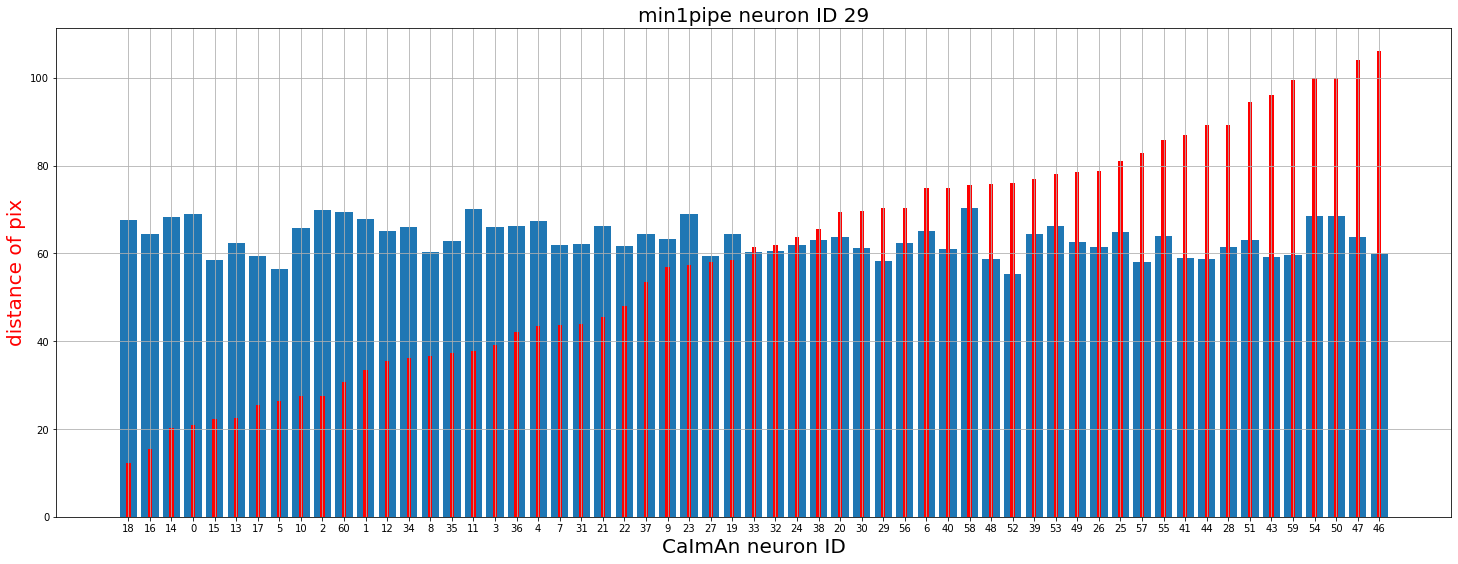

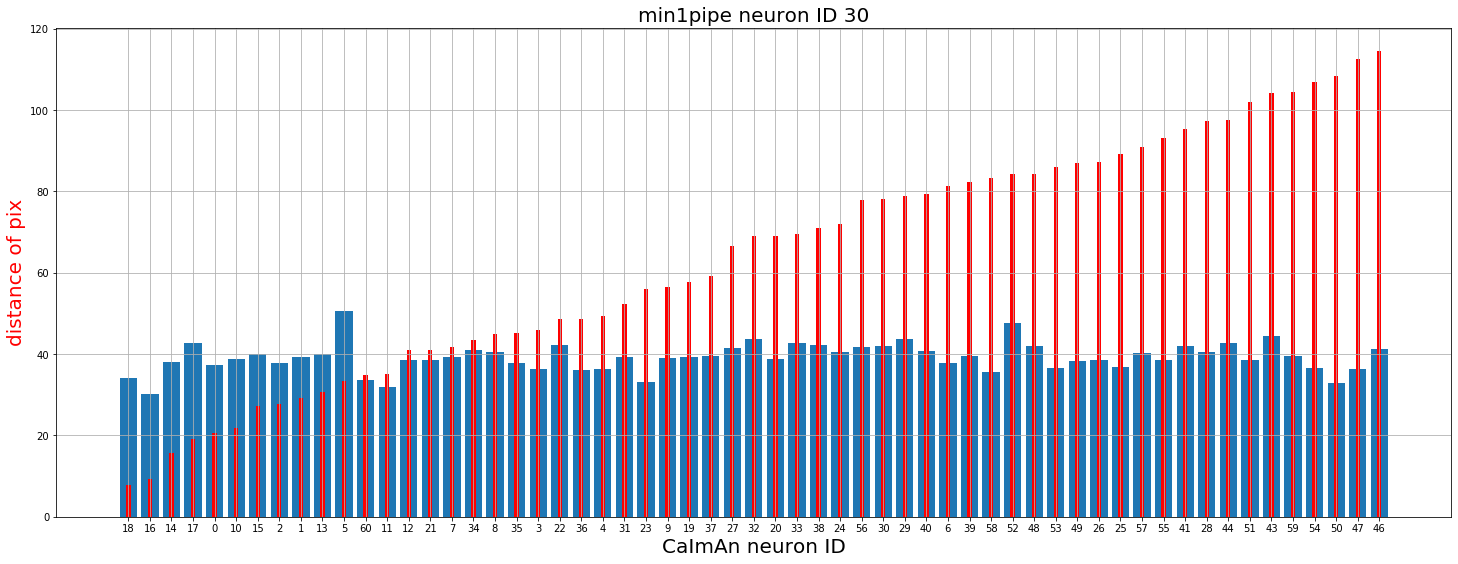

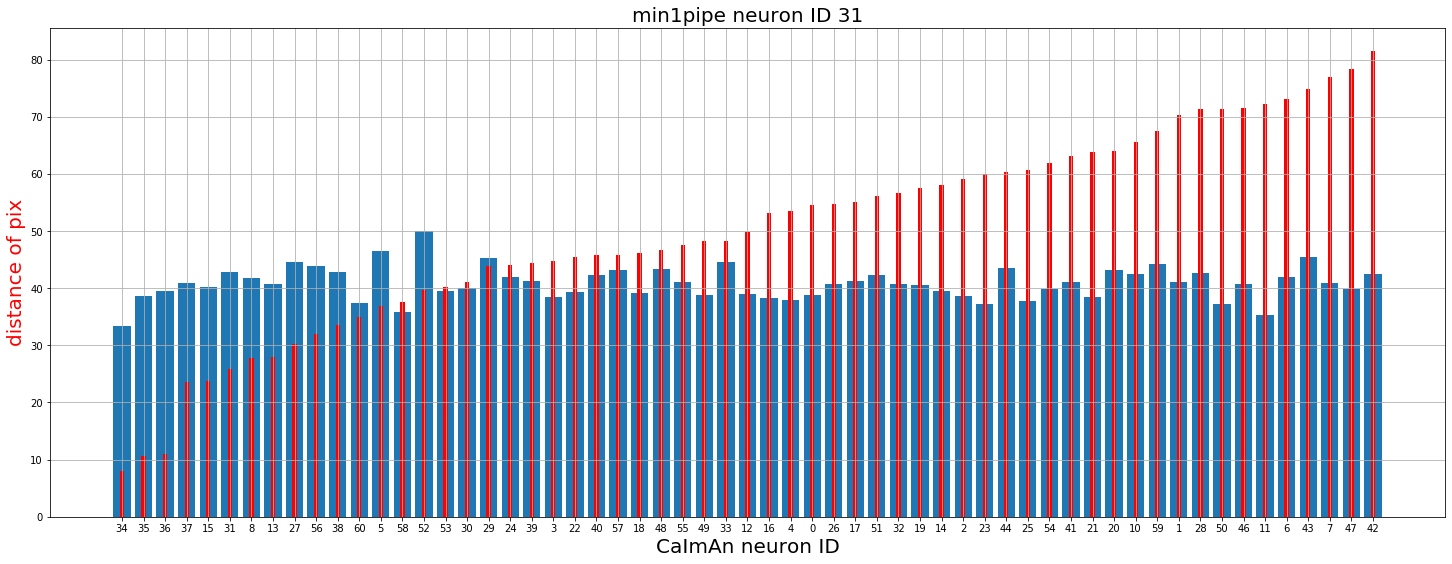

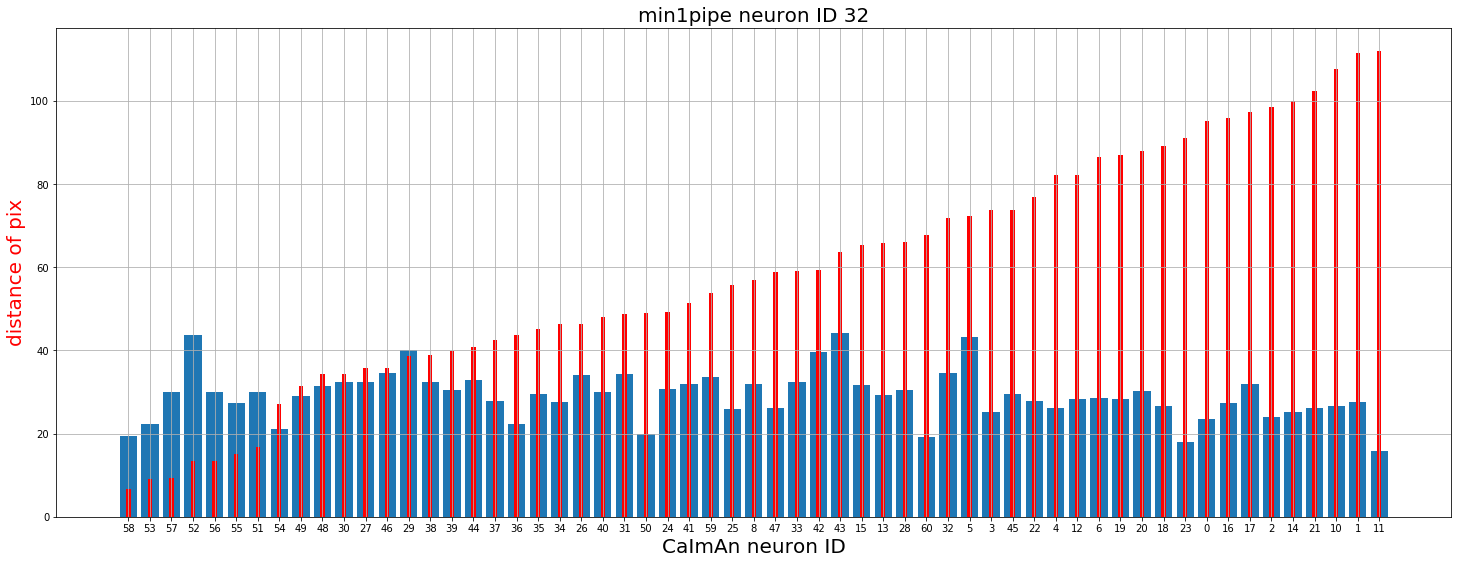

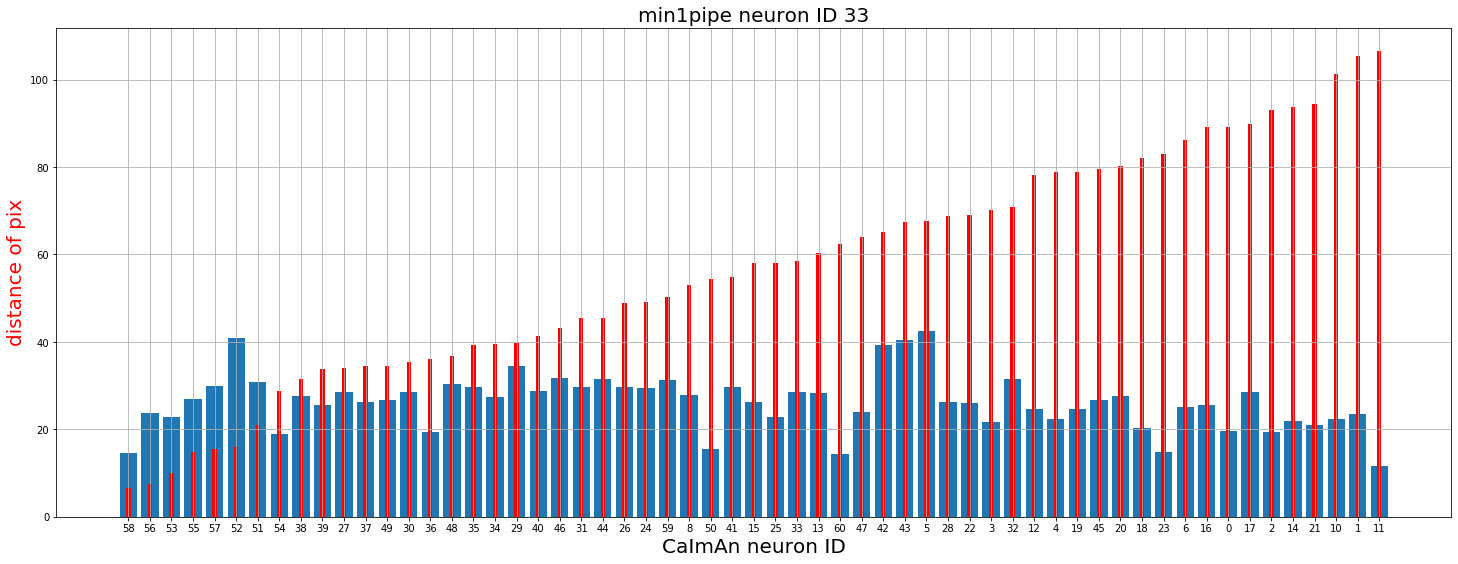

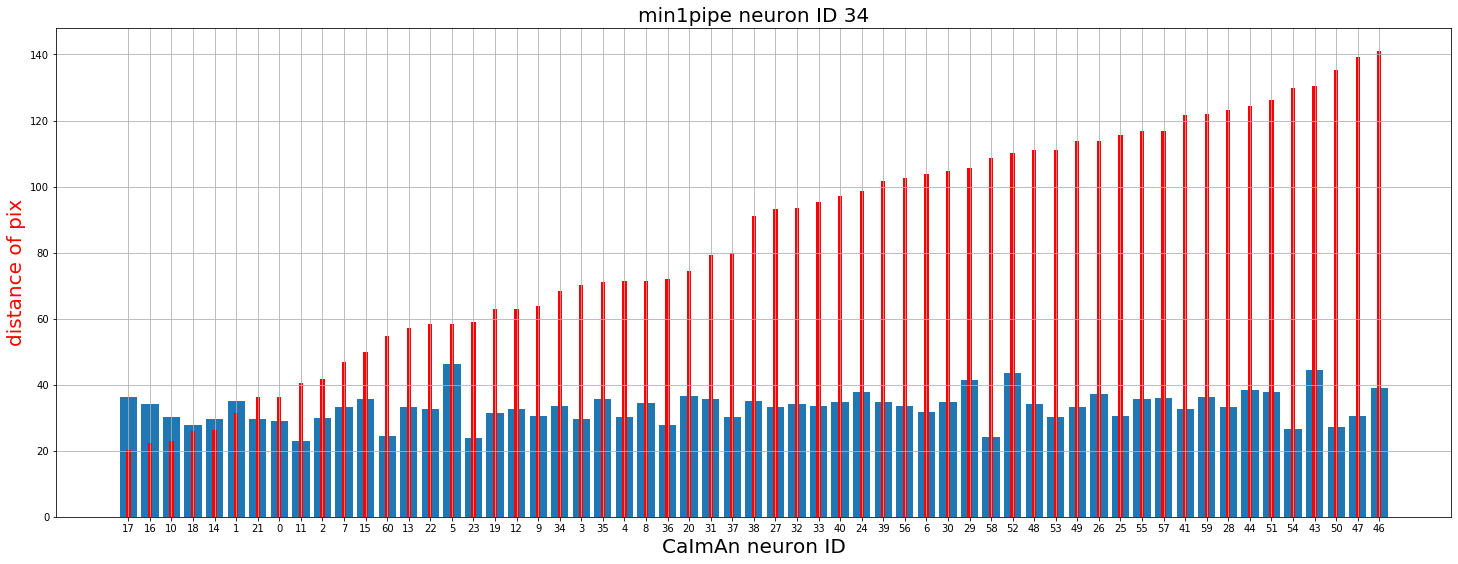

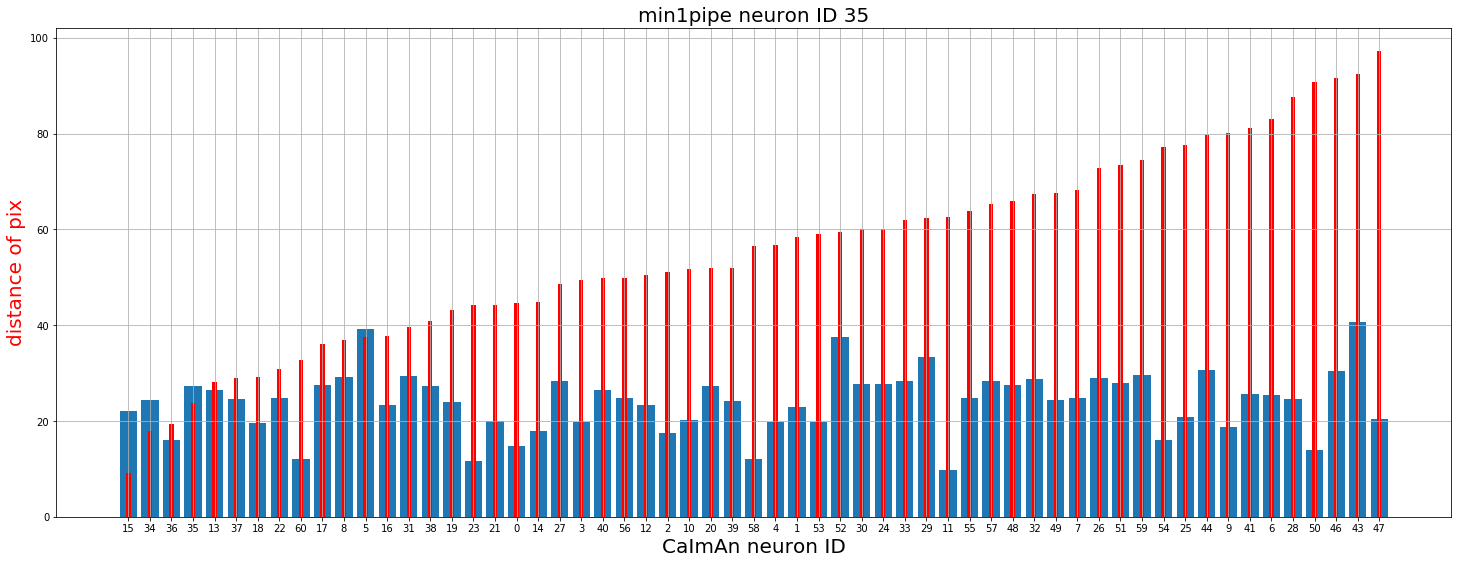

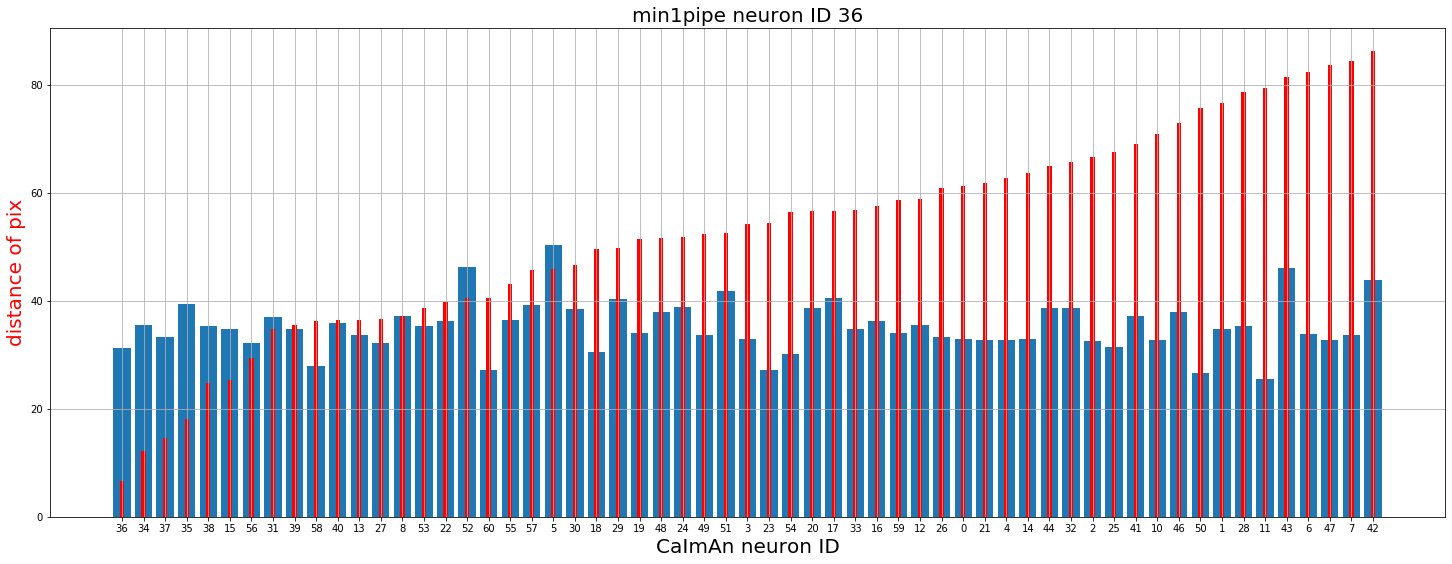

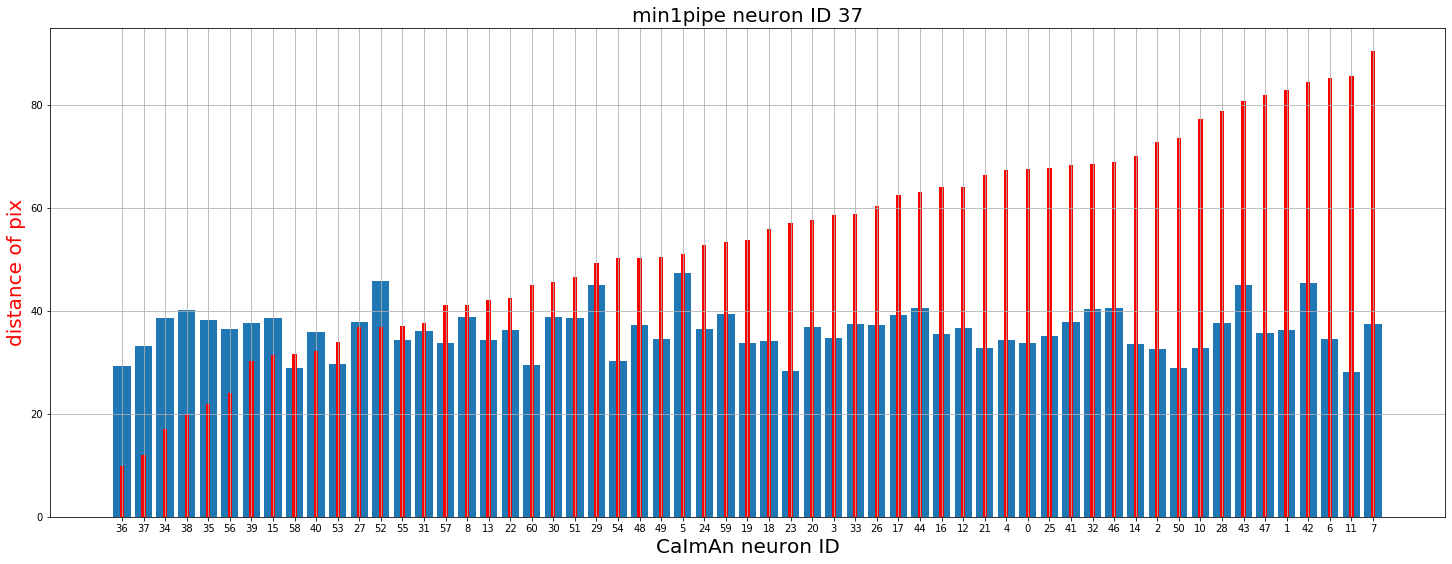

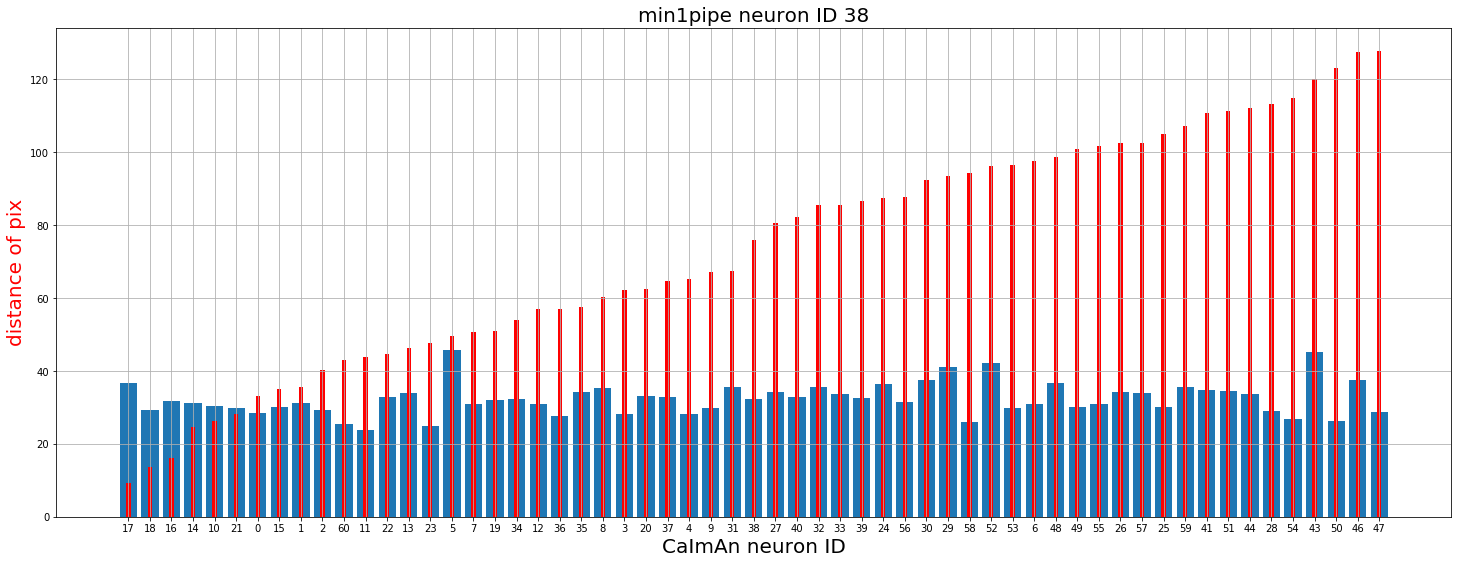

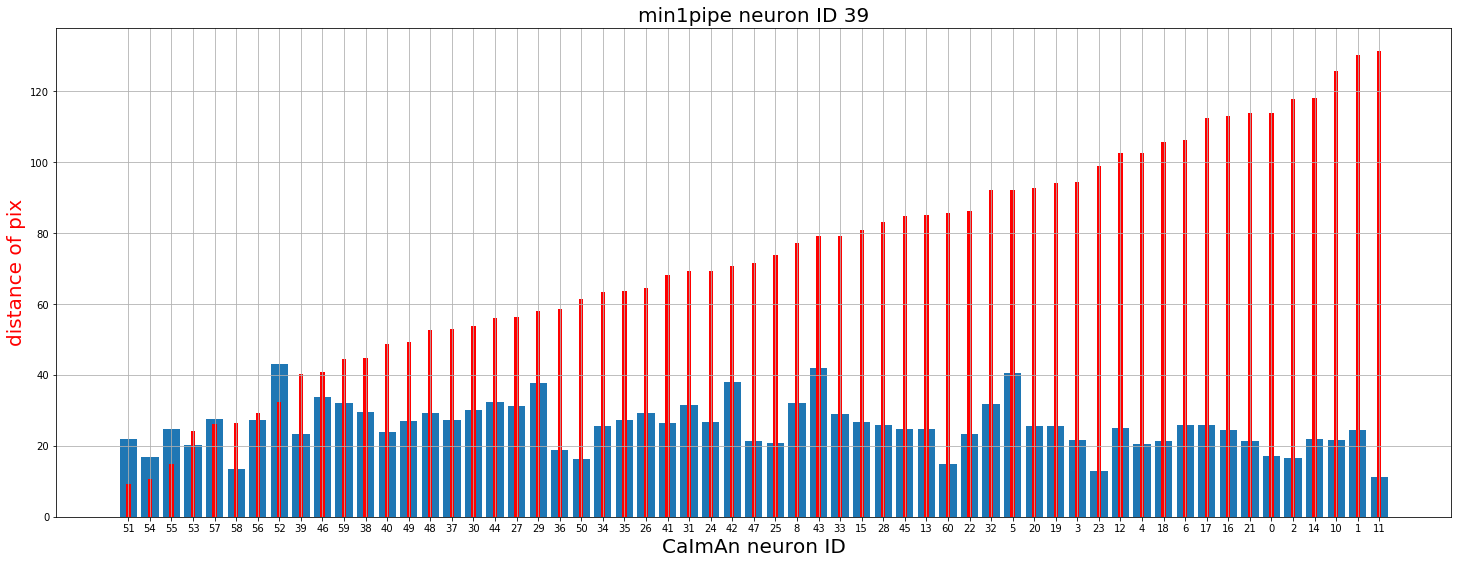

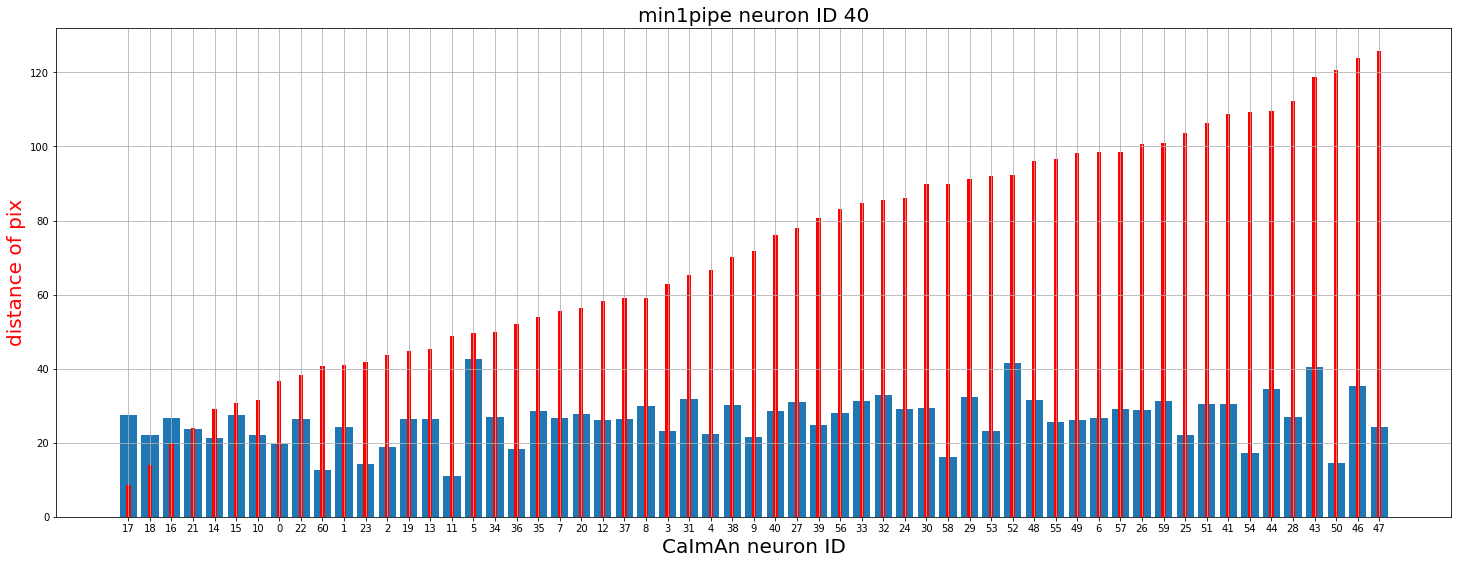

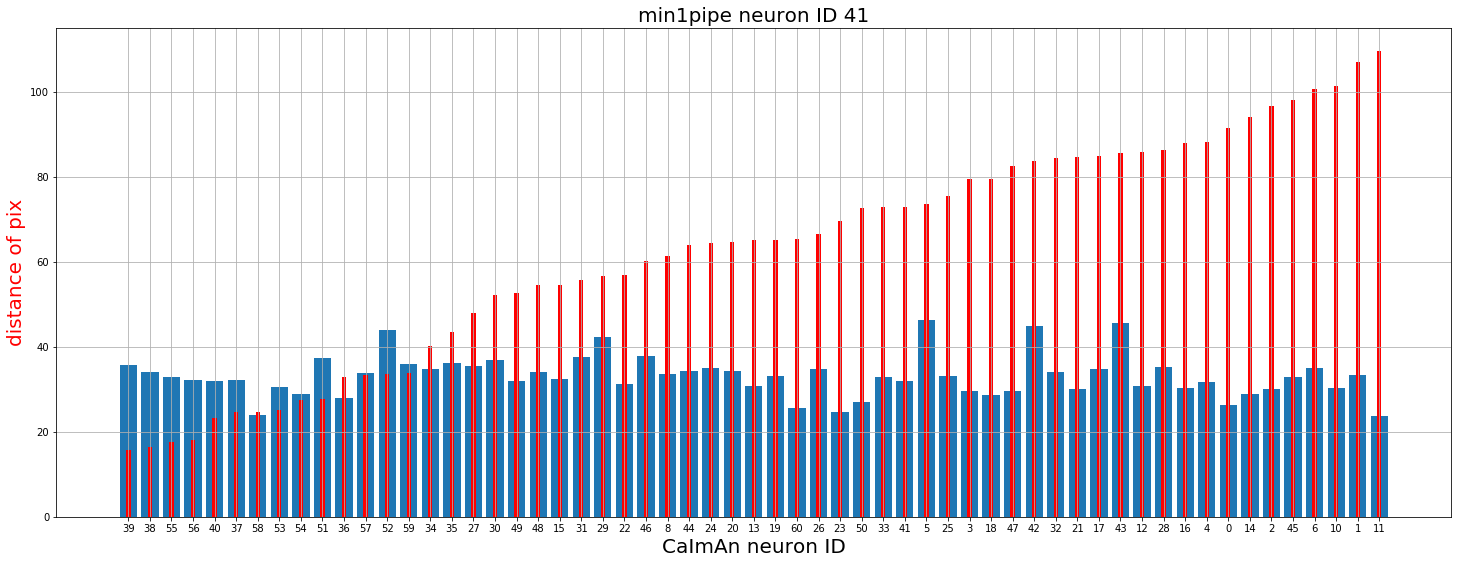

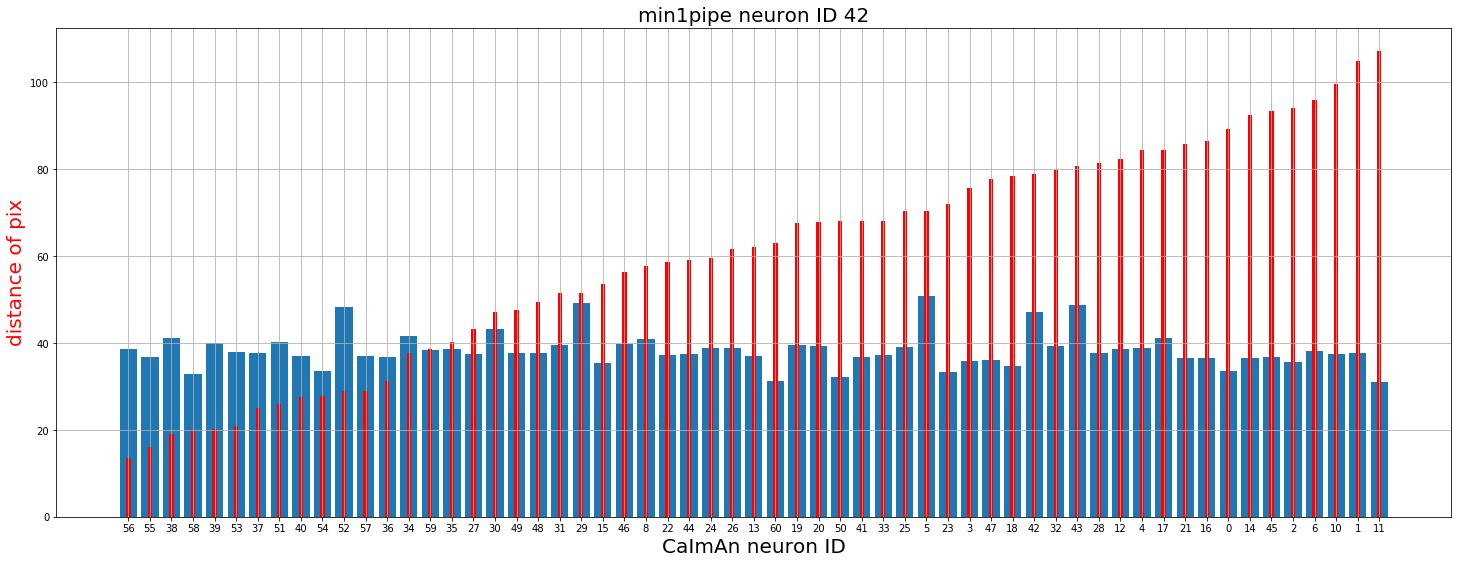

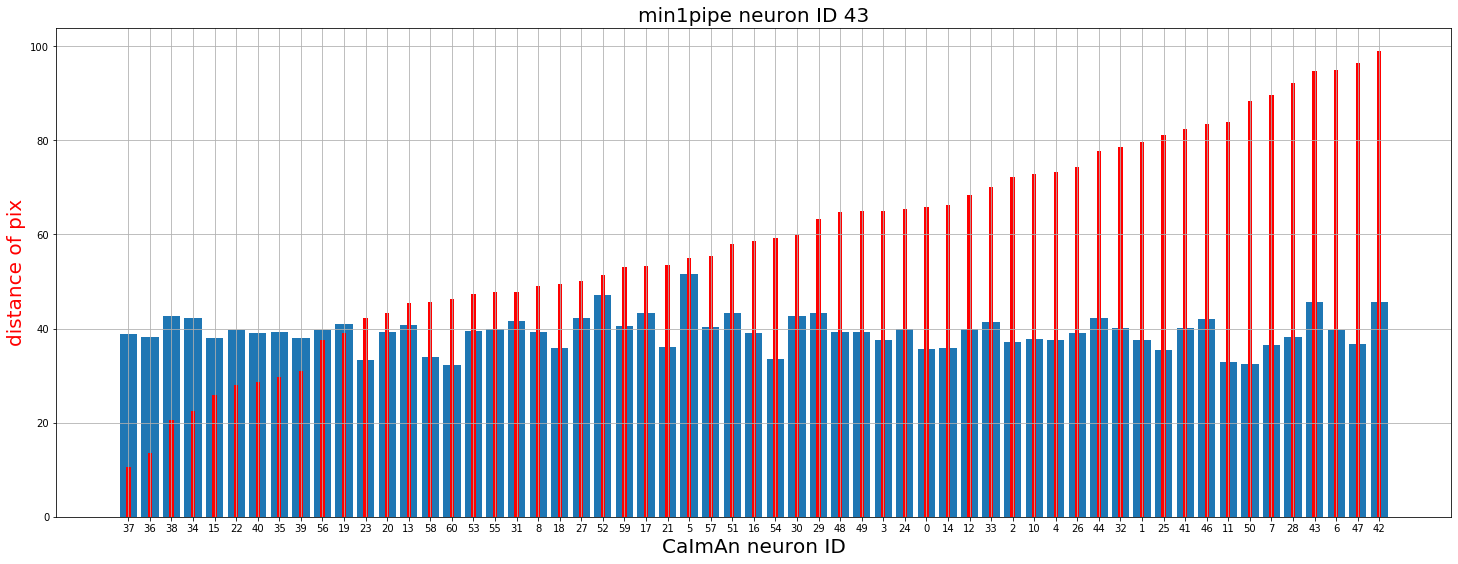

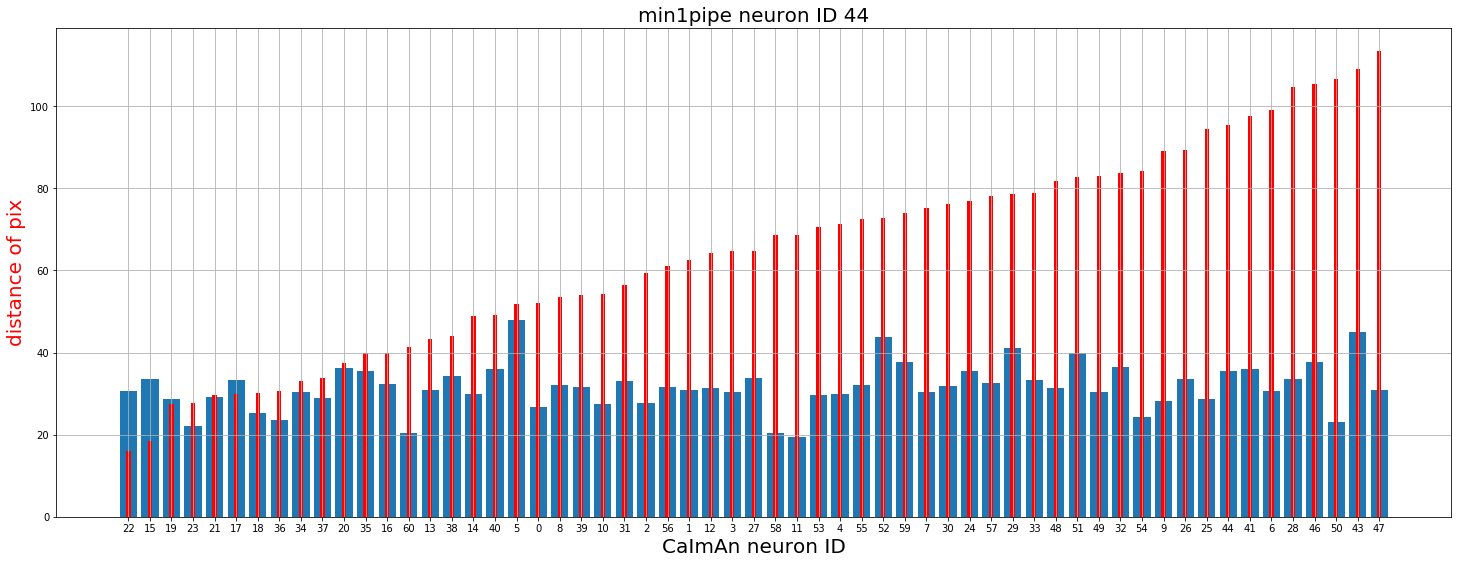

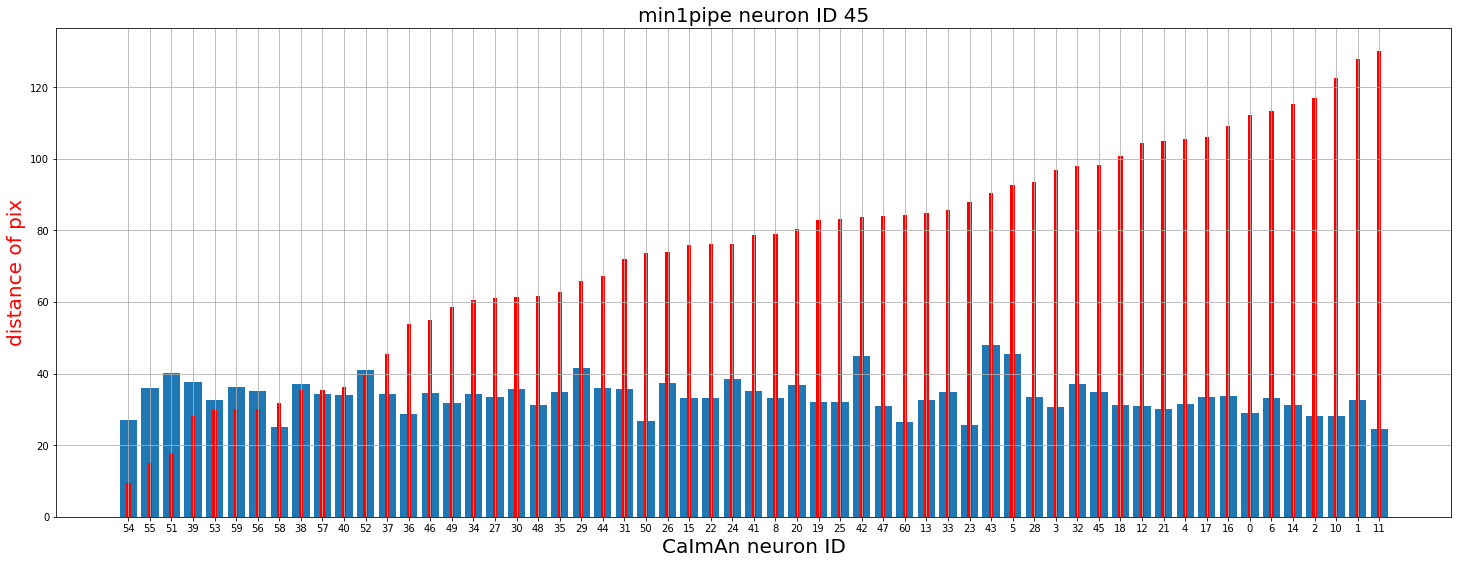

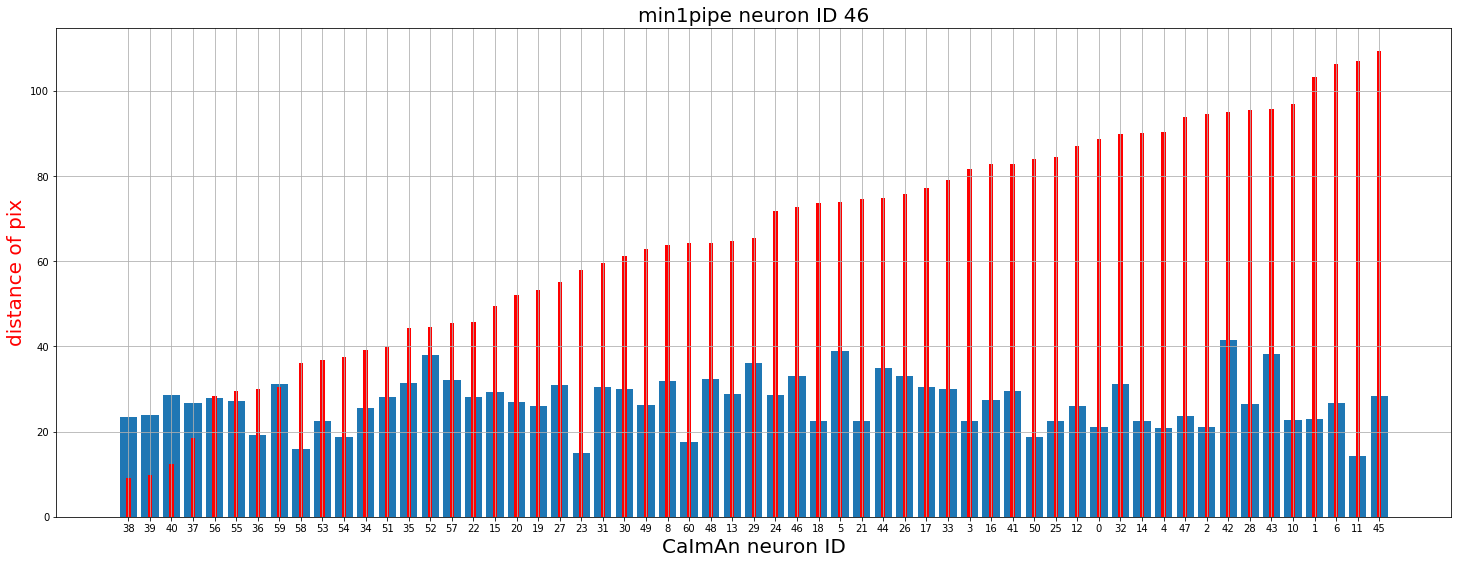

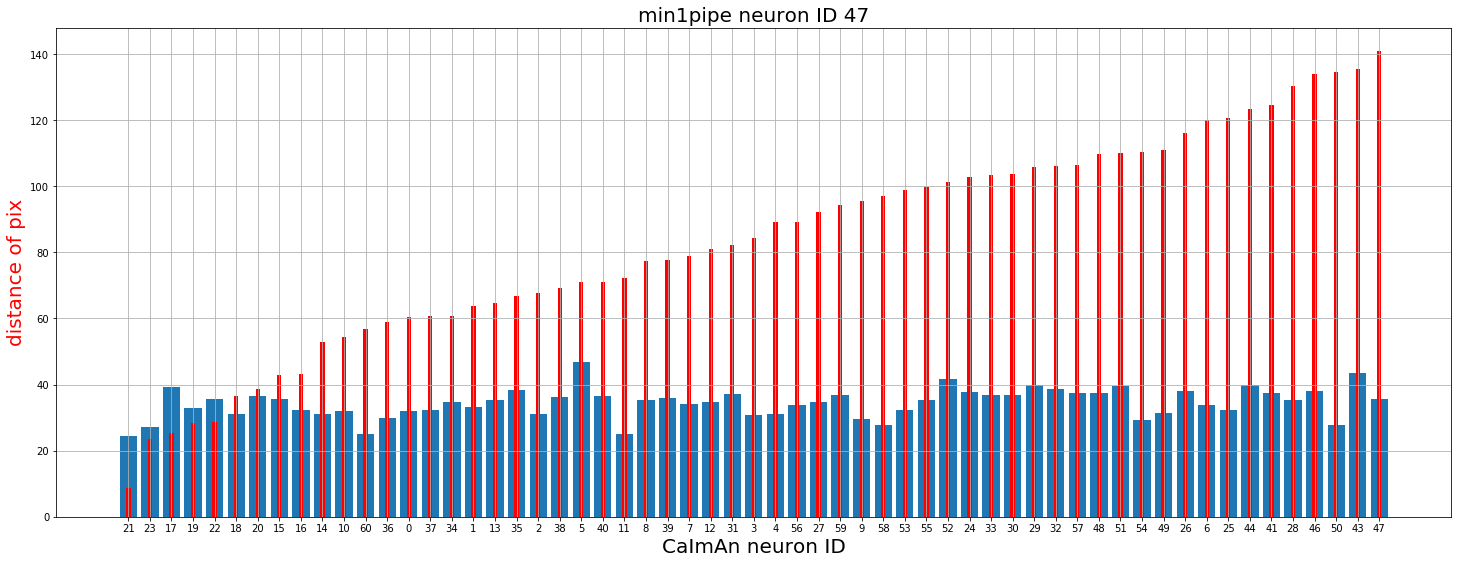

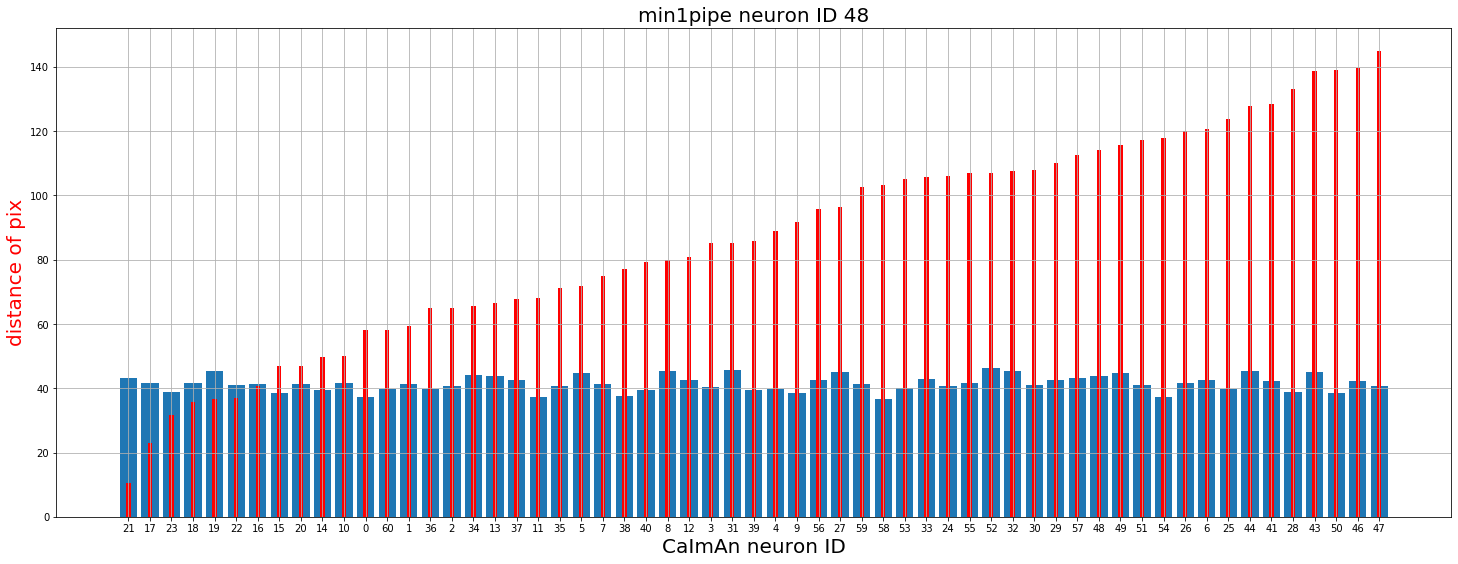

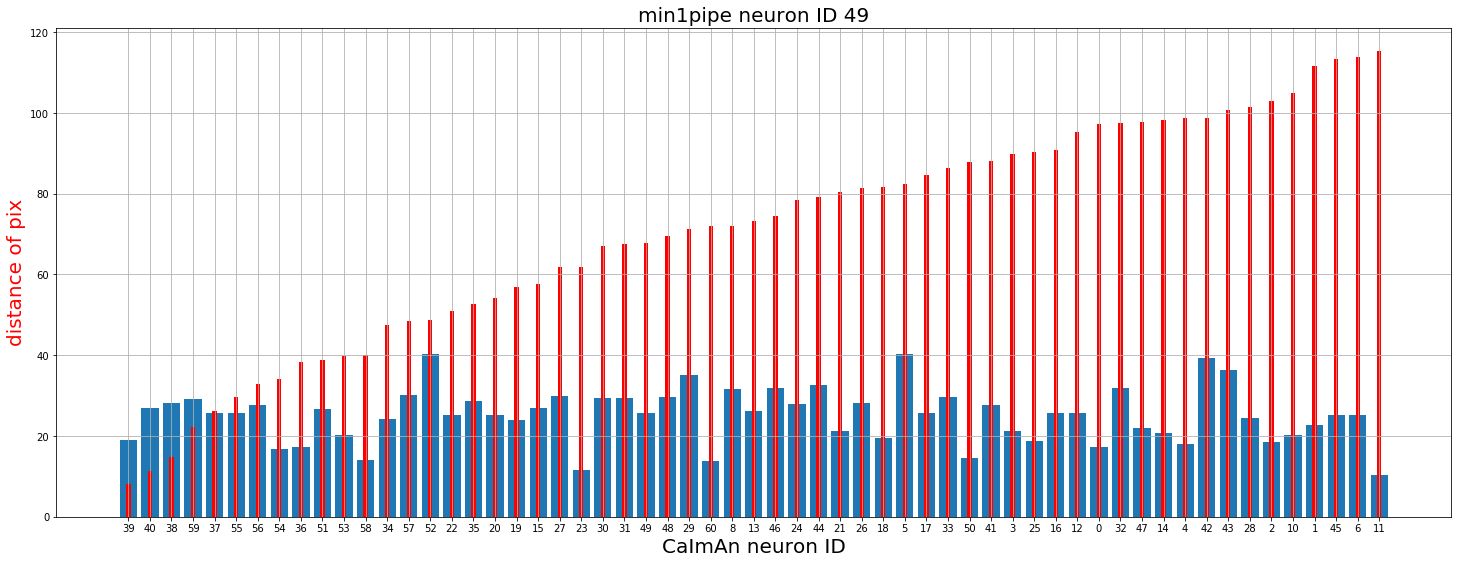

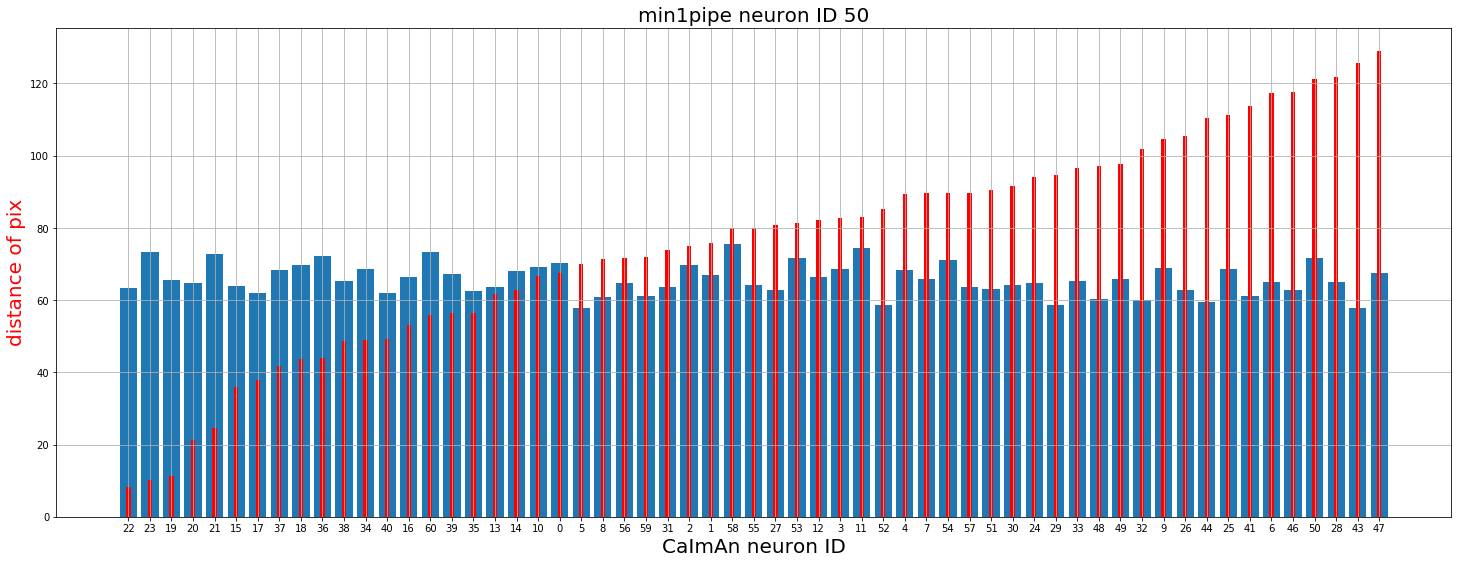

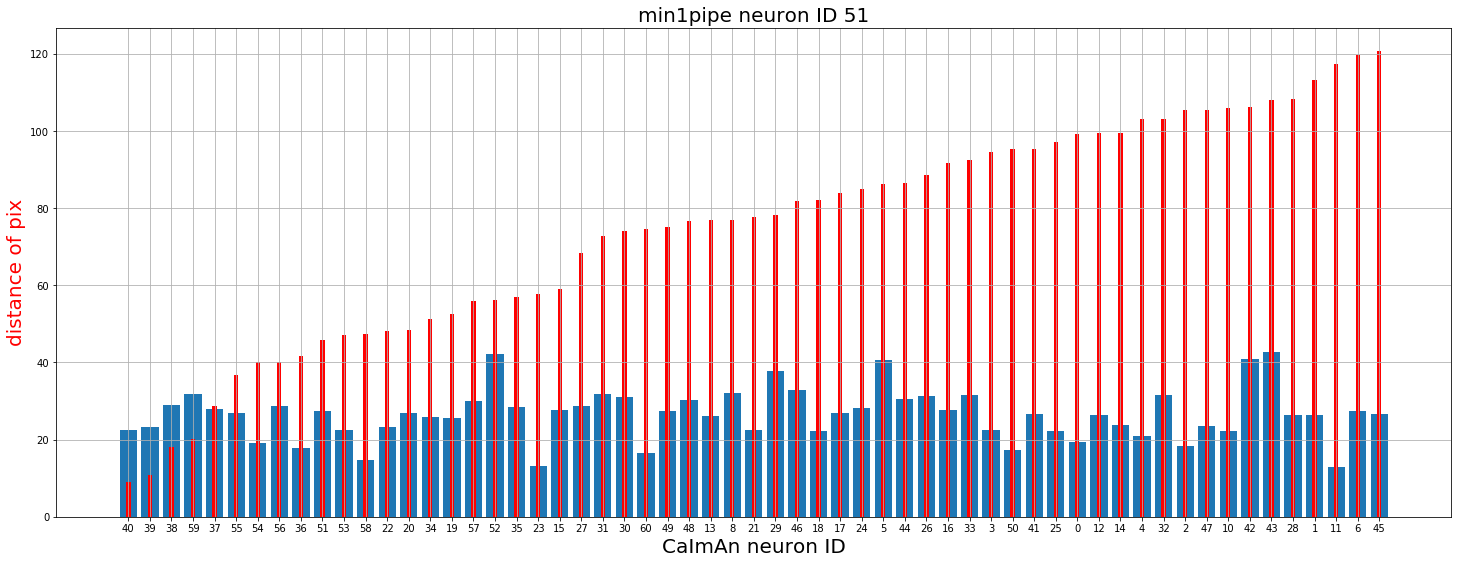

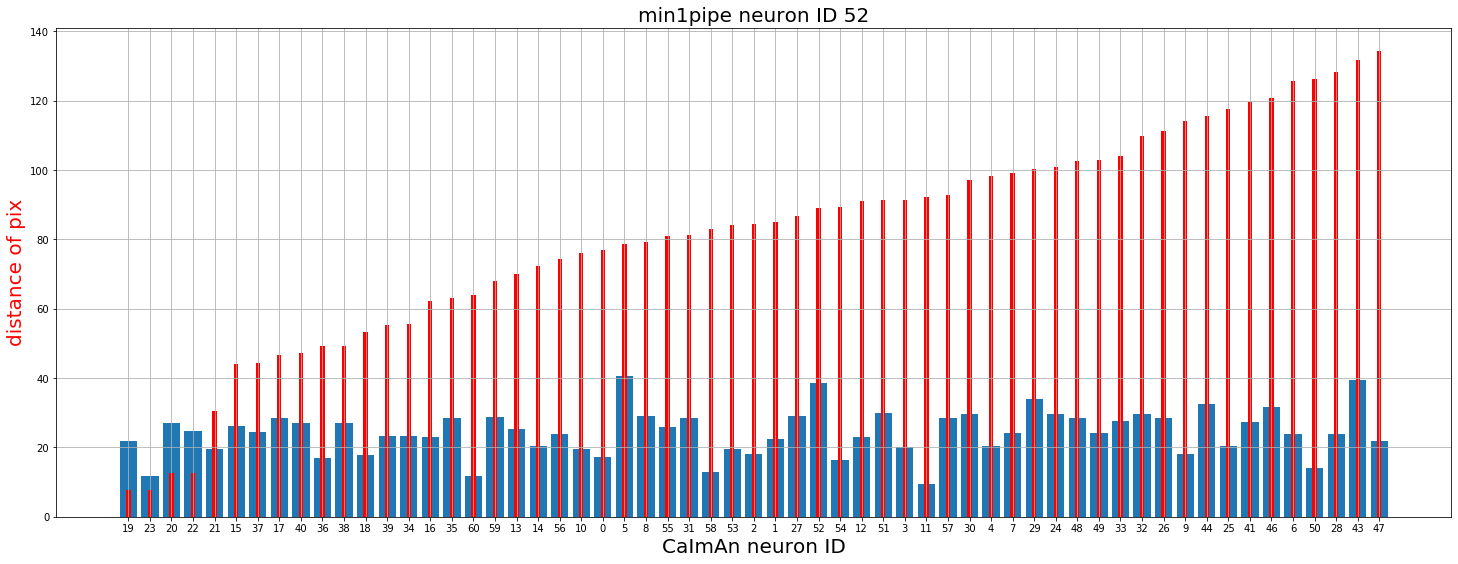

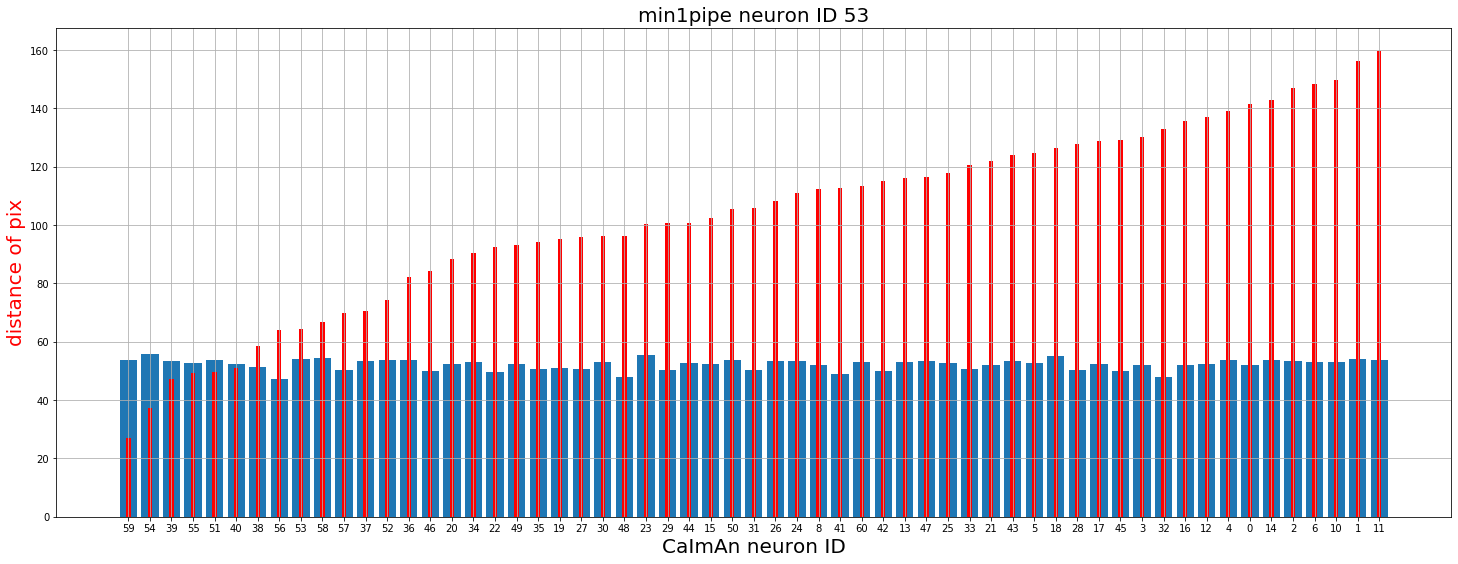

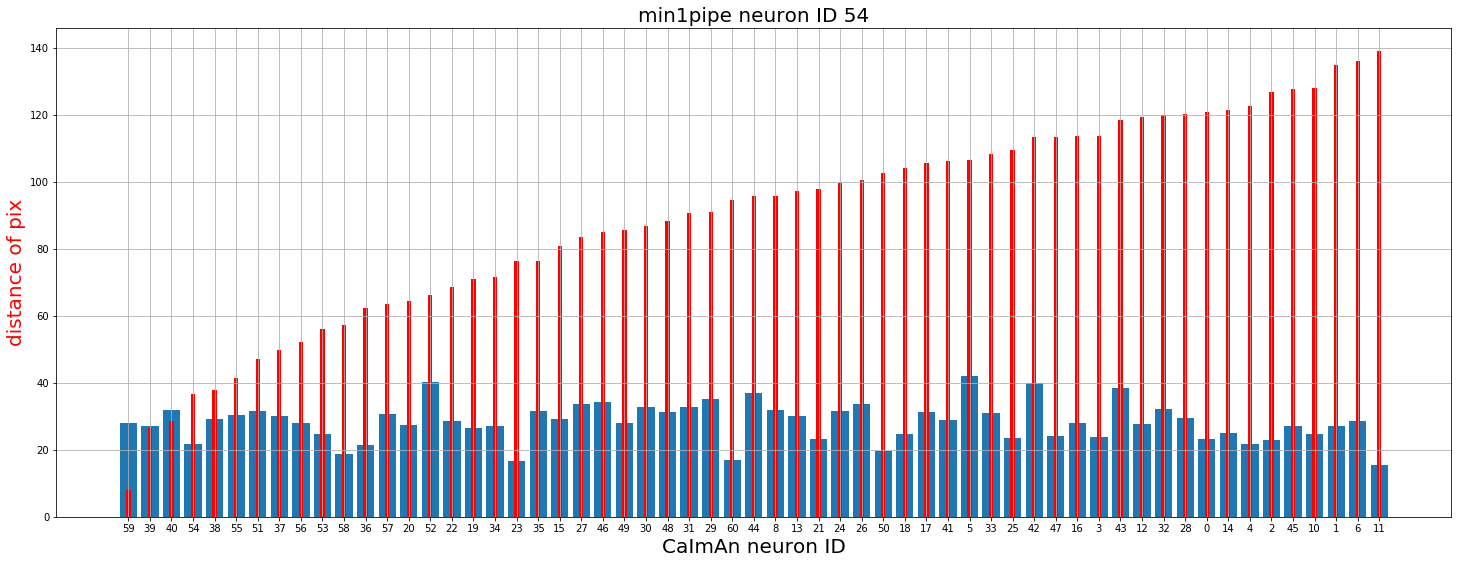

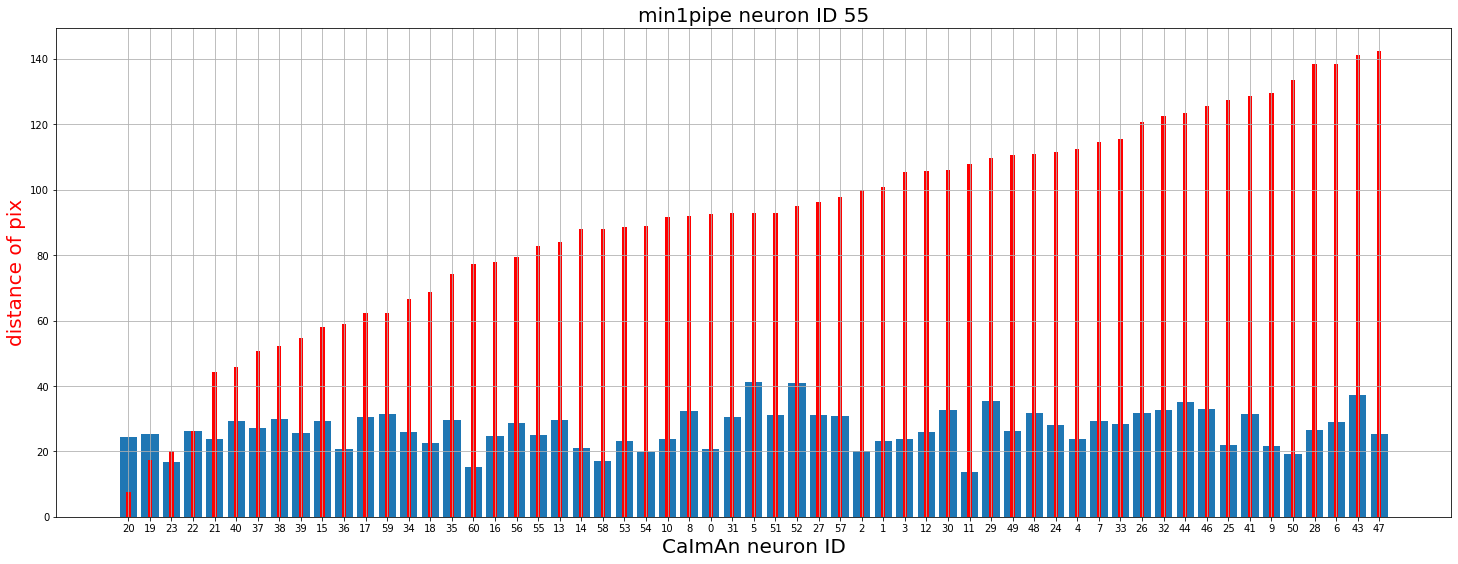

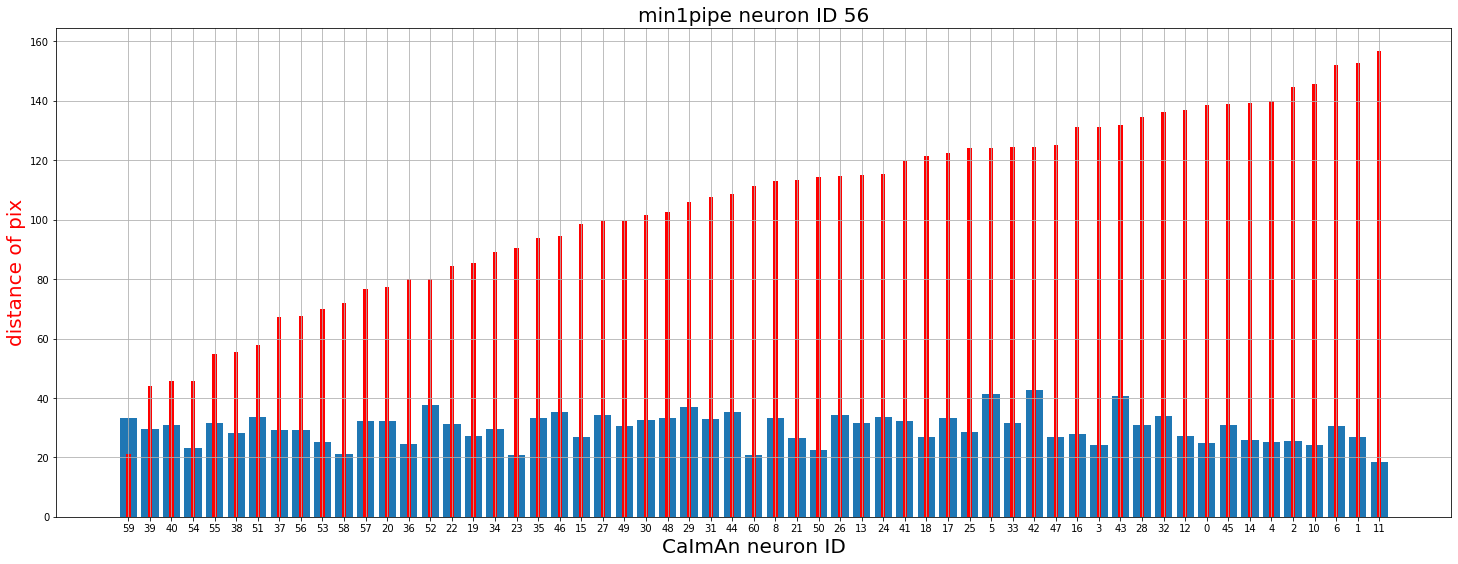

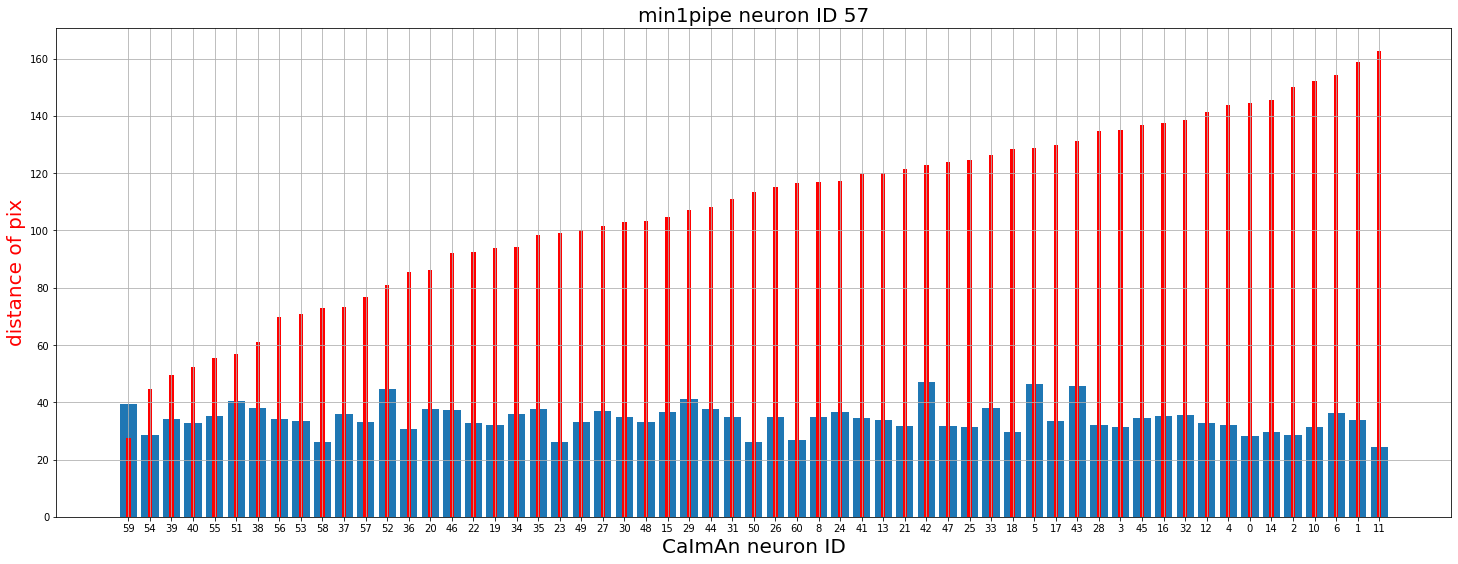

In [41]:
for n in range (0,58):
    vis_hist_set(n)

# 場所の表示

In [46]:
def comp_place_with(m,c):
    #min1pipe
    p = min1pipe[m]
    y = int(p//150)
    print("ヨコ",y)
    x = int(p%150) 
    print("タテ",x)
    im = np.zeros((150,150,4),dtype=np.uint8)
    im[:,:,-1]=255#アルファチャンネルz
    im[x][y][0] = 150
    im[x-1][y][0] = 150
    im[x+1][y][0] = 150
    im[x][y-1][0] = 150
    im[x][y+1][0] = 150
    
    #caiman
    for q in caiman[c]:
        y = int(q//150)
        x = int(q%150) 
        im[x][y][1] = 150
        pil = Image.fromarray(im) 
    
    pil = Image.fromarray(im)
    plt.imshow(pil)

# 三番目まで見る

In [86]:
from functools import reduce

def dynamic_thresh_filter(signal, scaling):
    average = reduce(lambda a, x: a + float(x), signal) / len(signal)
    # print('average =', average)
    thresh = average * scaling
    return thresh_filter(signal, thresh)

def thresh_filter(signal, thresh):
    return [float(x) if float(x) > thresh else 0.0 for x in signal]

#Euclid距離
def euclid(a,b):
    #a,bハlist
    # [print('a_elem=', a_elem) if type(a_elem) == str else 0 for a_elem in a]
    a, b = map(lambda x: dynamic_thresh_filter(x, 10), (a,b))
    # return np.sum([np.abs(float(a[i]) - float(b[i])) for i in range(len(a))])
    return np.sqrt(np.sum([(ae - be) ** 2 for ae, be in zip(a,b)]))

def comp_with_set(m):
    #CaImAn面積候補ヲ複数ダス
    c_0 = int(sortdist[:,0,1][m])#mハMIN1PIPEノid
    c_1 = int(sortdist[:,1,1][m])
    c_2 = int(sortdist[:,2,1][m])
    
    
#------------------------------------------    
    #min1pipe_place/red
    p = min1pipe[m]
    y = int(p//150)
    x = int(p%150) 
    im = np.zeros((150,150,4),dtype=np.uint8)
    im[:,:,-1]=250#アルファチャンネルz
    im[x][y][:] = 0
    
    im[x-1][y][:] = 0
    im[x-2][y][:] = 0
    im[x+1][y][:] = 0
    im[x+2][y][:] = 0
    im[x][y-1][:] = 0
    im[x][y-2][:] = 0
    im[x][y+1][:] = 0
    im[x][y+2][:] = 0

    #caiman_place_0/green
    for q in caiman[c_0]:
        y = int(q/150)#//
        x = int(q%150) 
        im[x][y][0] = 100#red
        pil = Image.fromarray(im) 
    #caiman_place_2
    for q in caiman[c_1]:
        y = int(q/150)#//
        x = int(q%150) 
        im[x][y][1] = 100#1 green
        pil = Image.fromarray(im)
    #caiman_place_2
    for q in caiman[c_2]:
        y = int(q/150)#//
        x = int(q%150) 
        im[x][y][2] = 100#2 brue
        pil = Image.fromarray(im) 

    cs = [c_0, c_1, c_2]
    for i in range(3):
        print('{:.2f}'.format(sortdist[m,i,-2],sortdist[m,i,-1]),"■H", '{:.1f}'.format(euclid(min1pipe_spikes[m],caiman_spikes[cs[i]]) / 1000), 'K')
    # print(sortdist[m,1,-2],sortdist[m,1,-1],"■H", euclid(min1pipe_spikes[m],caiman_spikes[c_1]))
    # print(sortdist[m,2,-2],sortdist[m,2,-1],"■H", euclid(min1pipe_spikes[m],caiman_spikes[c_2]))
    
    pil = Image.fromarray(im)
    plt.imshow(pil)
    #min1pipe_spike
    plt.figure(figsize=(20,3))
    plt.plot(min1pipe_spikes[m],c="black")
    plt.show()
    #caiman_spike_0
    plt.figure(figsize=(20,3))
    plt.plot(caiman_spikes[c_0],c="red")
    plt.show()
    #caiman_spike_1
    plt.figure(figsize=(20,3))
    plt.plot(caiman_spikes[c_1],c="green")
    plt.show()
    #caiman_spike_1
    plt.figure(figsize=(20,3))
    plt.plot(caiman_spikes[c_2],c="blue")
    plt.show()

5.72 ■H 27.9 K
11.54 ■H 47.9 K
16.05 ■H 41.7 K


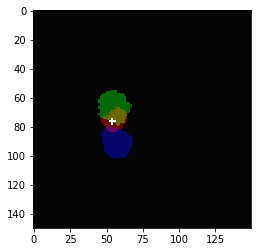

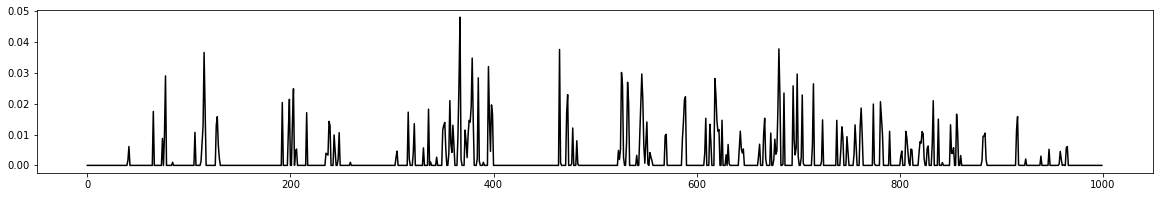

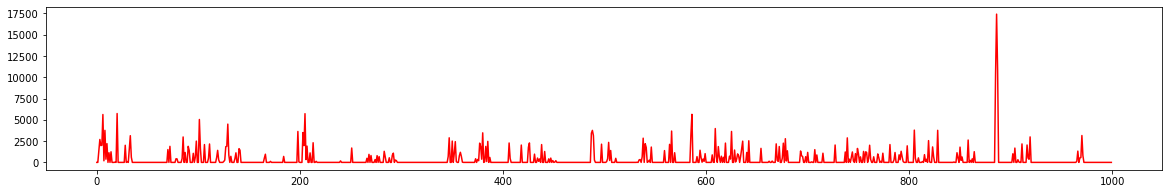

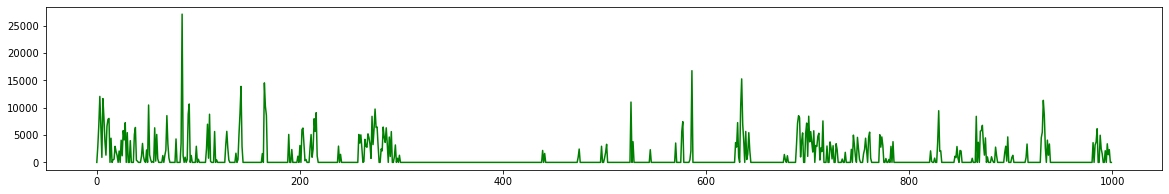

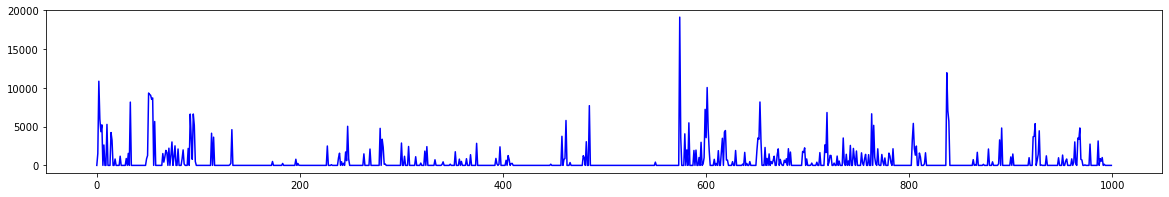

In [119]:
comp_with_set(0)

8.18 ■H 86.5 K
8.41 ■H 47.3 K
14.48 ■H 47.9 K


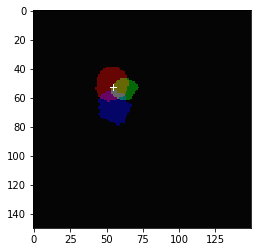

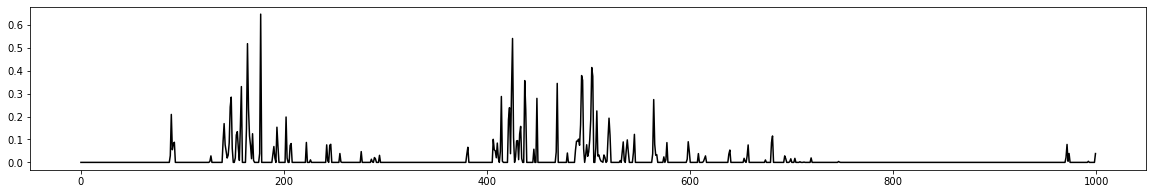

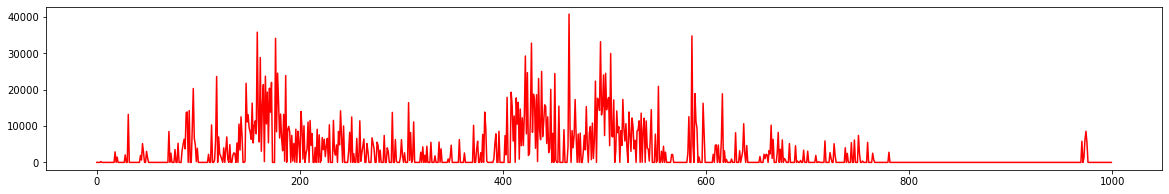

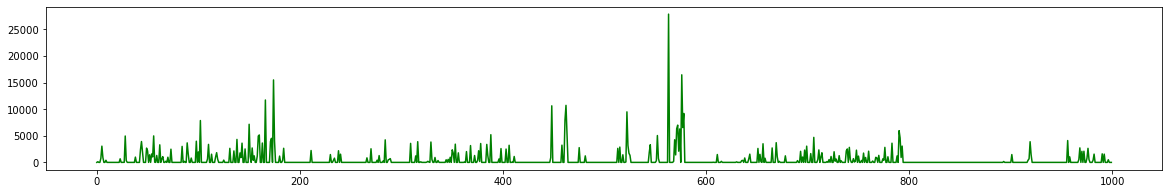

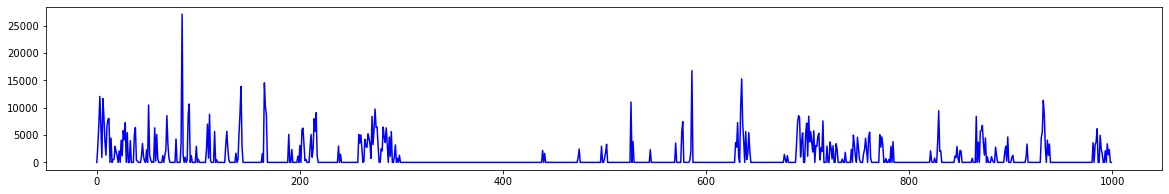

In [120]:
comp_with_set(1)

21.01 ■H 35.2 K
44.06 ■H 72.2 K
45.61 ■H 49.3 K


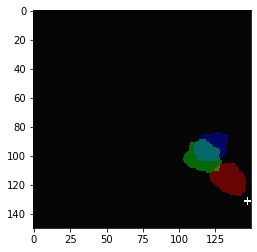

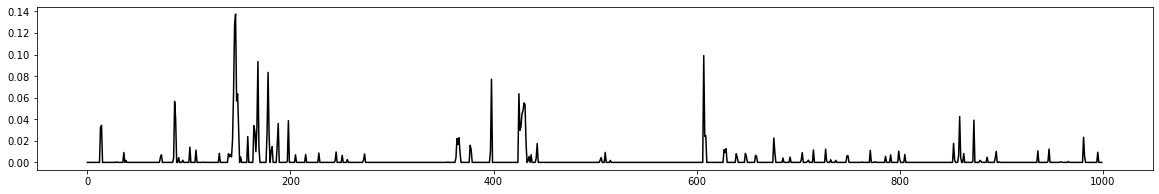

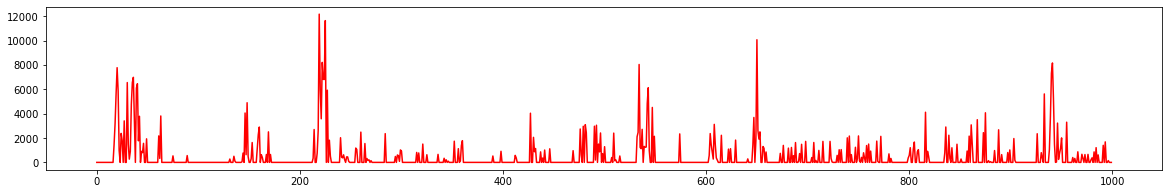

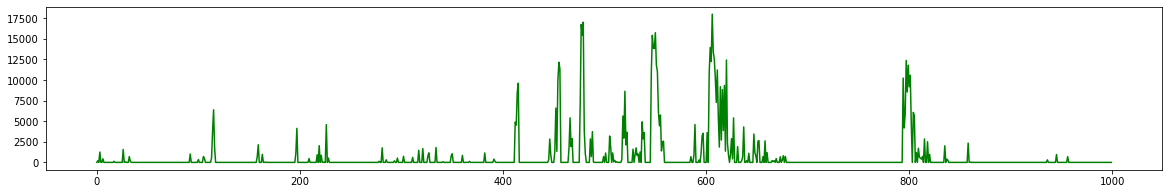

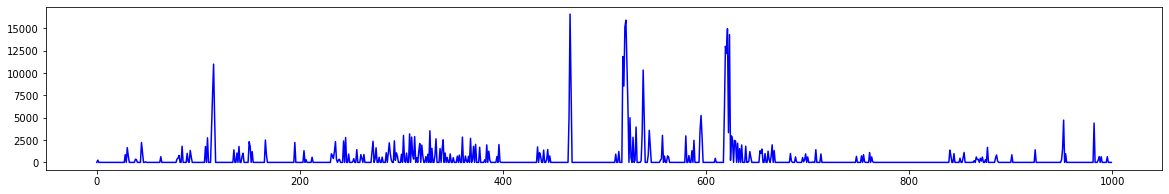

In [116]:
comp_with_set(-2)